In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
df = pd.read_csv('data/Loan.csv')

In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (20000, 36)


In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtiliz

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate       

## ApplicationDate

In [6]:
df["ApplicationDate"]

0        2018-01-01
1        2018-01-02
2        2018-01-03
3        2018-01-04
4        2018-01-05
            ...    
19995    2072-09-29
19996    2072-09-30
19997    2072-10-01
19998    2072-10-02
19999    2072-10-03
Name: ApplicationDate, Length: 20000, dtype: object

In [7]:
df = df.drop("ApplicationDate", axis=1)

In [8]:
df

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,High School,19,24521,36,Married,3,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,Employed,Associate,33,25818,36,Married,5,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,48958,645,Employed,Bachelor,20,37033,72,Married,3,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,41025,560,Employed,High School,36,14760,72,Married,3,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


## Age

In [9]:
df["Age"]

0        45
1        38
2        47
3        58
4        37
         ..
19995    44
19996    56
19997    44
19998    60
19999    20
Name: Age, Length: 20000, dtype: int64

In [10]:
print(df['Age'].describe())

count    20000.000000
mean        39.752600
std         11.622713
min         18.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64


In [11]:
age_distribution = df['Age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Count']
print(age_distribution)

    Age  Count
0    18    803
1    40    715
2    39    682
3    42    676
4    37    669
..  ...    ...
58   80      8
59   74      8
60   76      4
61   78      3
62   79      3

[63 rows x 2 columns]


Text(0, 0.5, 'Frequency')

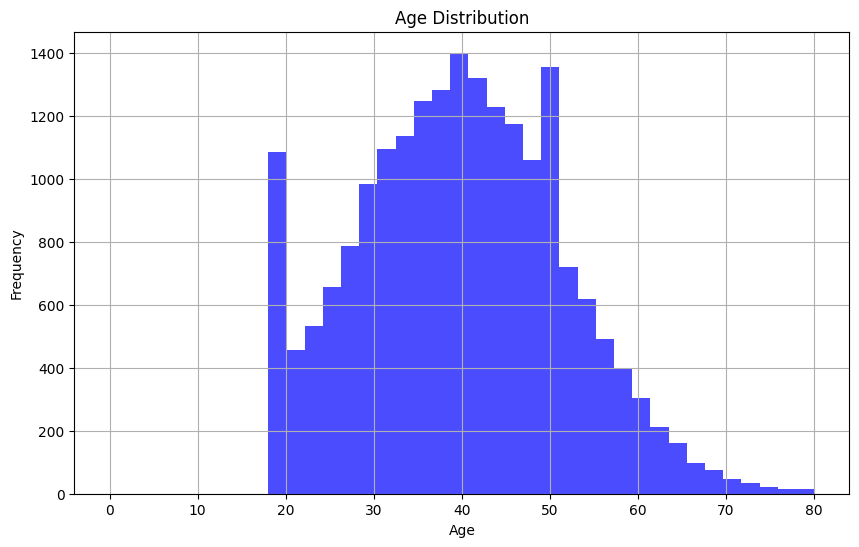

In [12]:
# Target variable distribution
plt.figure(figsize=(10, 6))

# Age distribution
plt.plot(3, 3, 2)
df['Age'].hist(bins=30, alpha=0.7, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

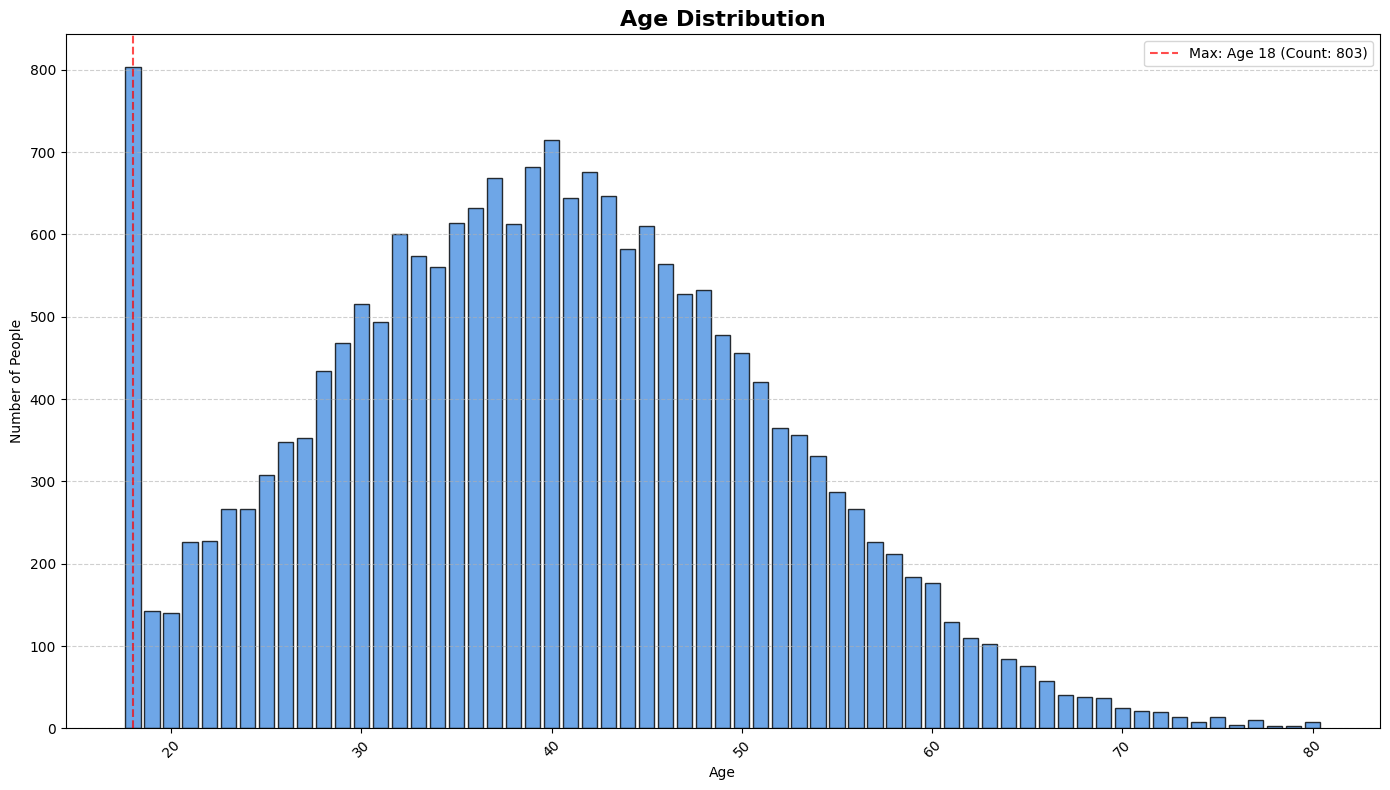

Top 10 Ages by Count:
Age
18    803
19    142
20    140
21    227
22    228
23    267
24    267
25    308
26    348
27    353
Name: count, dtype: int64


In [13]:
plt.figure(figsize=(14, 8))

# Since we have discrete ages, let's use a bar chart instead of histogram
age_counts = df['Age'].value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values, color='#4A90E2', alpha=0.8, edgecolor='black')
plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of People')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Highlight the maximum value (age 18)
max_age = age_counts.idxmax()
max_count = age_counts.max()
plt.axvline(x=max_age, color='red', linestyle='--', alpha=0.7, 
           label=f'Max: Age {max_age} (Count: {max_count})')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print the top ages
print("Top 10 Ages by Count:")
print(age_counts.head(10))

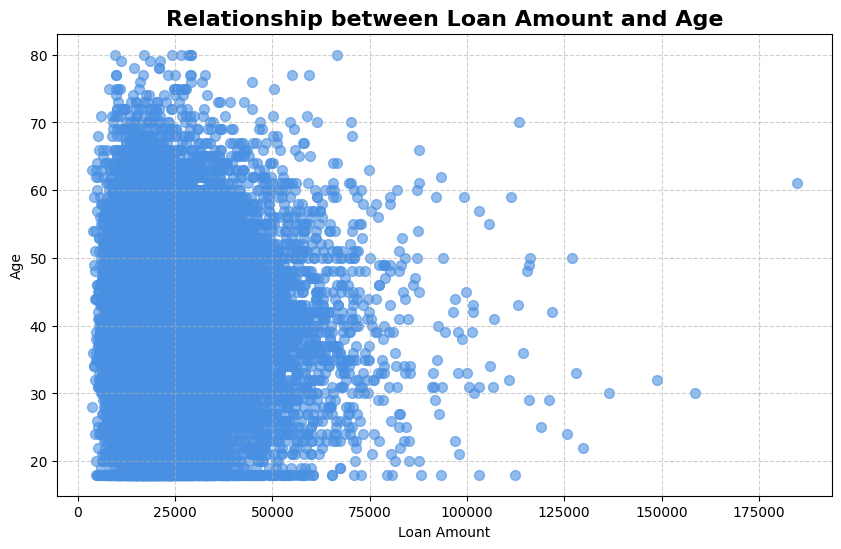

In [14]:
# Assuming your data is loaded into a DataFrame named 'df'
plt.figure(figsize=(10, 6))

# Use .dropna() to ensure any rows with missing 'Age' or 'LoanAmount' are skipped for plotting
plt.scatter(
    df['LoanAmount'].dropna(),
    df['Age'].dropna(),
    color='#4A90E2',
    alpha=0.6,
    s=50  # Size of the points
)

plt.title('Relationship between Loan Amount and Age', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--', alpha=0.6)

Loan Amount Statistics by Age:
    LoanAmount                         
          mean   median       std count
Age                                    
18    25071.12  22520.0  13043.03   803
19    25142.42  22696.0  11985.14   142
20    25177.29  22371.0  14421.87   140
21    24847.65  22344.0  13721.05   227
22    25266.87  22795.0  14046.91   228
23    26027.17  22390.0  15001.72   267
24    27299.09  24603.0  15381.26   267
25    25424.93  22199.0  14119.68   308
26    24723.16  21854.0  12908.07   348
27    24724.60  21316.0  13802.51   353


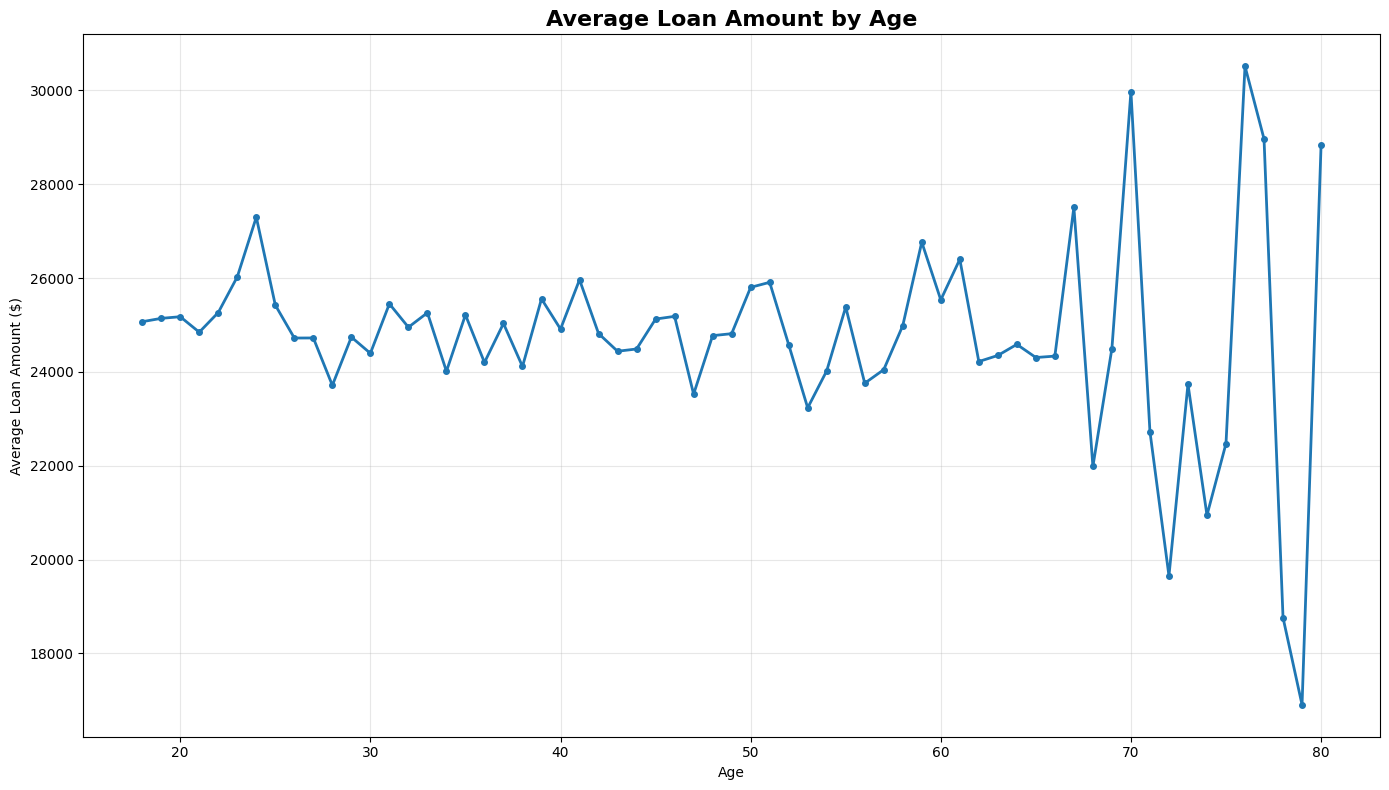

In [15]:
# Calculate statistics by age
age_loan_stats = df.groupby('Age').agg({
    'LoanAmount': ['mean', 'median', 'std', 'count']
}).round(2)

print("Loan Amount Statistics by Age:")
print(age_loan_stats.head(10))

# Plot average loan amount by age
plt.figure(figsize=(14, 8))
age_avg_loan = df.groupby('Age')['LoanAmount'].mean()

plt.plot(age_avg_loan.index, age_avg_loan.values, marker='o', linewidth=2, markersize=4)
plt.title('Average Loan Amount by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Average Loan Amount ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

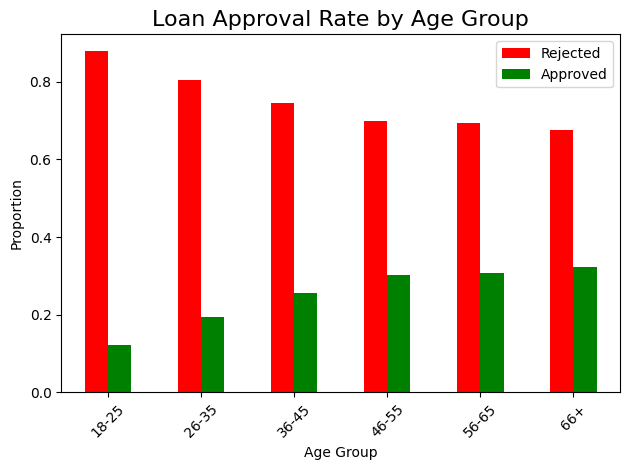

In [16]:
# Create age groups
age_bins = [18, 25, 35, 45, 55, 65, 80]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create approval counts by age group
approval_by_age = pd.crosstab(df['AgeGroup'], df['LoanApproved'], normalize='index')

plt.figure(figsize=(12, 8))
approval_by_age.plot(kind='bar', color=['red', 'green'])
plt.title('Loan Approval Rate by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(['Rejected', 'Approved'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

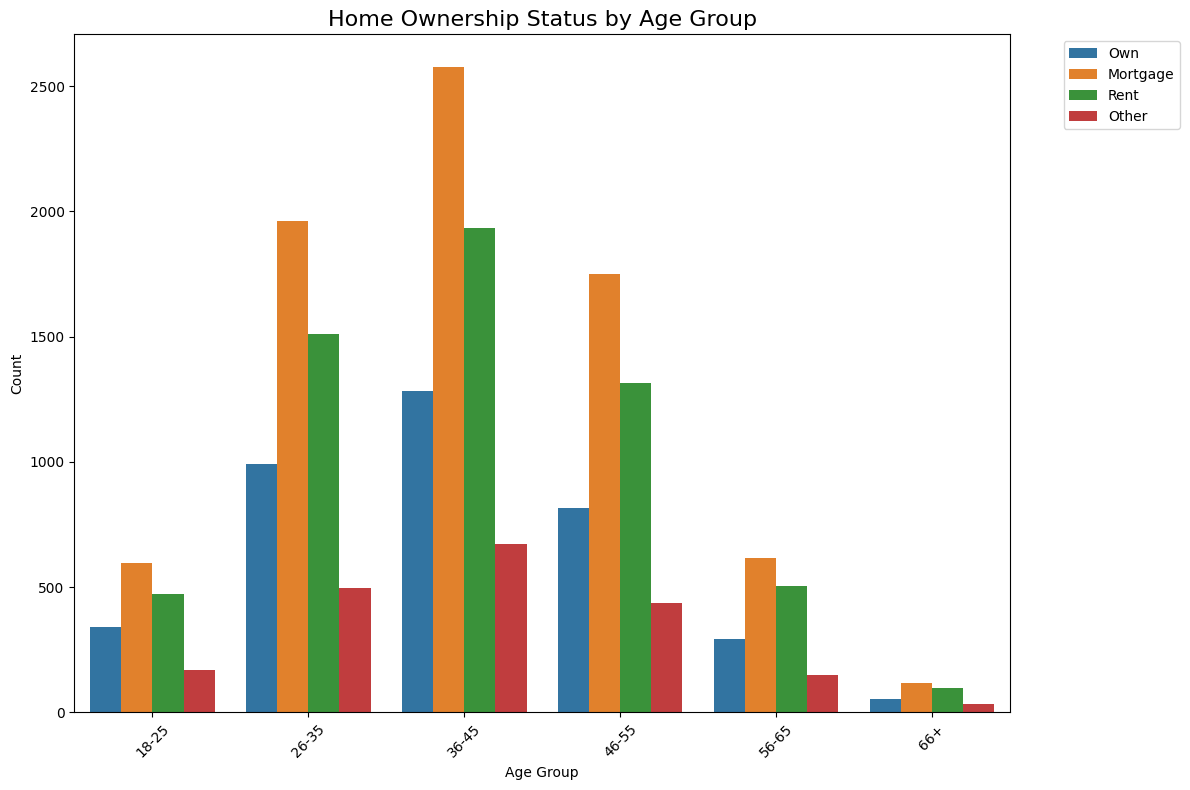

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeGroup', hue='HomeOwnershipStatus', data=df)
plt.title('Home Ownership Status by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
df = df.drop("Age", axis=1)

In [19]:
df

,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup
0,39948,617,Employed,Master,22,13152,48,Married,2,Own,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,36-45
1,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,36-45
2,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,46-55
3,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,56-65
4,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,High School,19,24521,36,Married,3,Rent,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,36-45
19996,49246,567,Employed,Associate,33,25818,36,Married,5,Rent,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,56-65
19997,48958,645,Employed,Bachelor,20,37033,72,Married,3,Mortgage,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,36-45
19998,41025,560,Employed,High School,36,14760,72,Married,3,Own,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,56-65


## AnnualIncome

In [20]:
df["AnnualIncome"]

0         39948
1         39709
2         40724
3         69084
4        103264
          ...  
19995     30180
19996     49246
19997     48958
19998     41025
19999     53227
Name: AnnualIncome, Length: 20000, dtype: int64

In [21]:
df["AnnualIncome"].describe()

count     20000.000000
mean      59161.473550
std       40350.845168
min       15000.000000
25%       31679.000000
50%       48566.000000
75%       74391.000000
max      485341.000000
Name: AnnualIncome, dtype: float64

In [22]:
age_distribution = df['AnnualIncome'].value_counts().reset_index()
age_distribution.columns = ['AnnualIncome', 'Count']
print(age_distribution)

       AnnualIncome  Count
0             15000    584
1            300000     26
2             34958      4
3             36604      4
4             26437      4
...             ...    ...
17511         63300      1
17512         41288      1
17513         59192      1
17514         15059      1
17515         50449      1

[17516 rows x 2 columns]


Text(0, 0.5, 'Frequency')

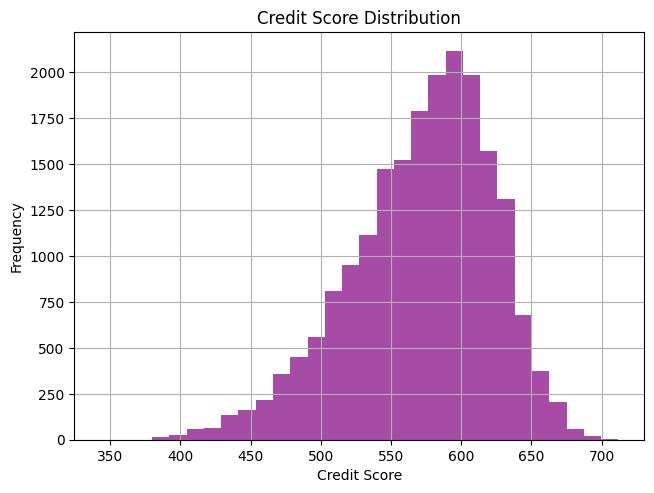

In [23]:
# Target variable distribution
plt.figure(figsize=(25, 18))

# Credit Score distribution
plt.subplot(3, 3, 4)
df['CreditScore'].hist(bins=30, alpha=0.7, color='purple')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

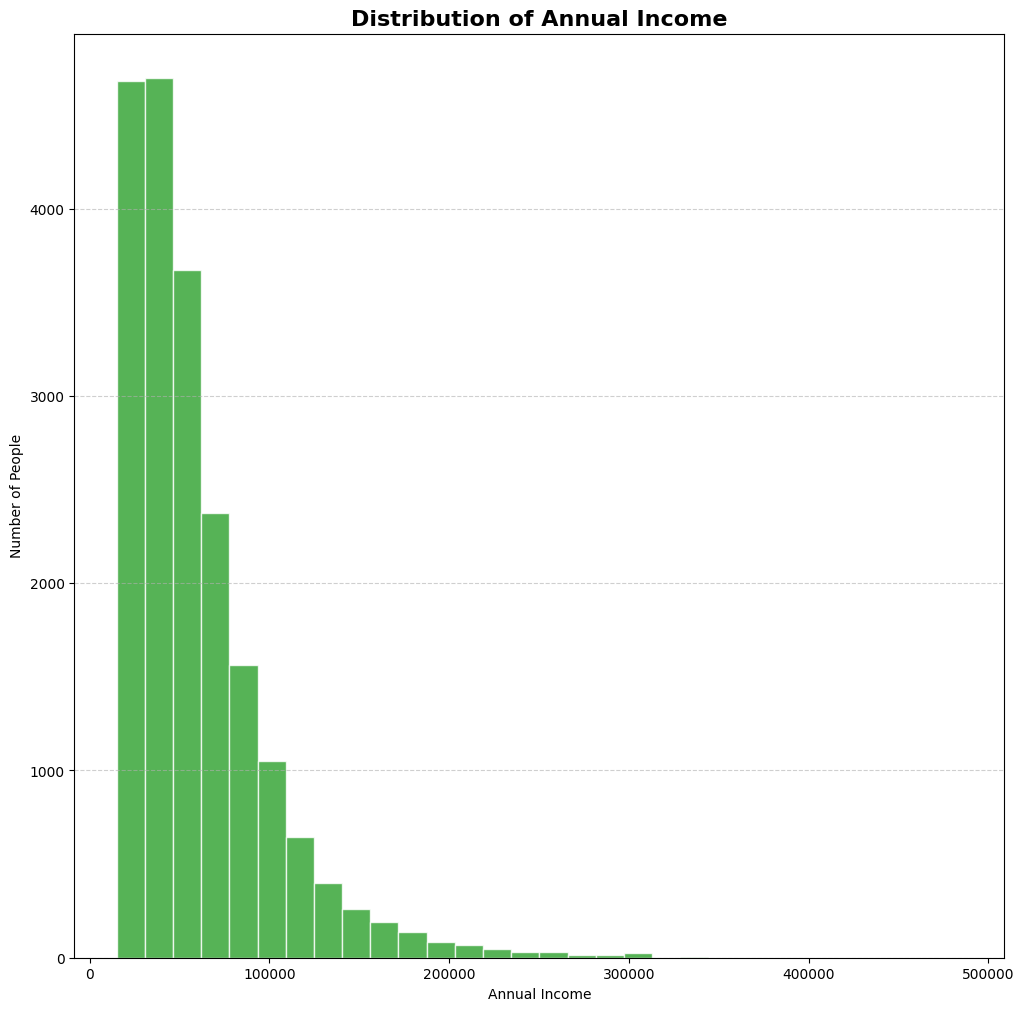

In [24]:
# Assuming your data is loaded into a DataFrame named 'df'
plt.figure(figsize=(12, 12))
# Use .dropna() to handle missing values and set a reasonable number of bins
plt.hist(
    df['AnnualIncome'].dropna(),
    bins=30,  # A higher number of bins gives more detail
    color='#2CA02C',
    edgecolor='white',
    alpha=0.8
)

plt.title('Distribution of Annual Income', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.6)

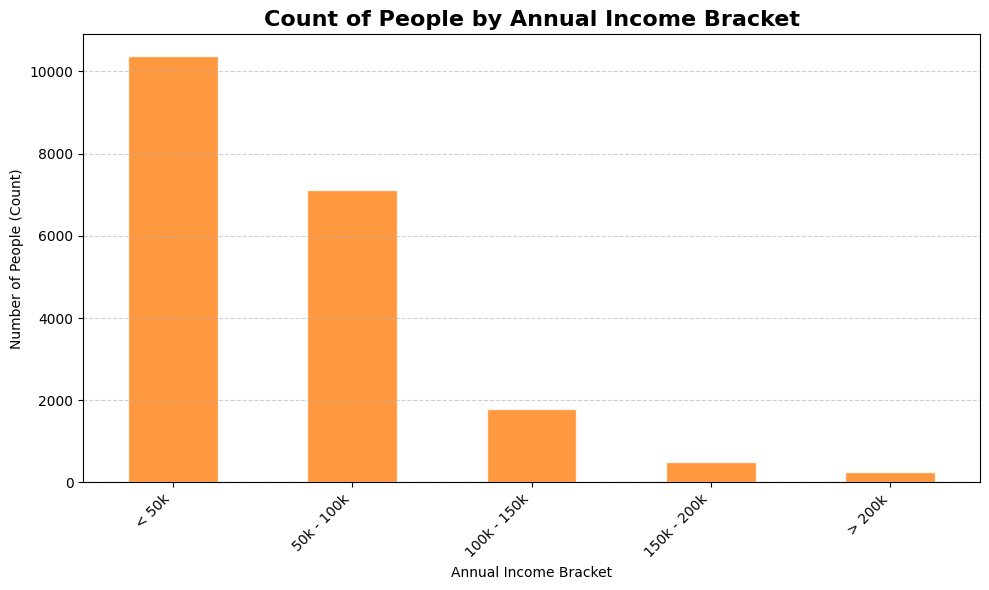

In [25]:
# --- 1. Define Income Bins ---
min_income = df['AnnualIncome'].min()
max_income = df['AnnualIncome'].max()

# Create 5 equally spaced bins (quantiles or custom cuts might be better for real data)
bins = [0, 50000, 100000, 150000, 200000, max_income]
labels = ['< 50k', '50k - 100k', '100k - 150k', '150k - 200k', '> 200k']

# Use pd.cut to assign each income to a bin
df['Income_Category'] = pd.cut(
    df['AnnualIncome'],
    bins=bins,
    labels=labels,
    right=False,
    duplicates='drop'
).astype(str)

# --- 2. Calculate Counts and Plot ---
income_counts = df['Income_Category'].value_counts().reindex(labels).fillna(0) 
plt.figure(figsize=(10, 6))
income_counts.plot(
    kind='bar',
    color='#FF7F0E',
    edgecolor='white',
    alpha=0.8
)

plt.title('Count of People by Annual Income Bracket', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Number of People (Count)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

## CreditScore

In [26]:
df["CreditScore"]

0        617
1        628
2        570
3        545
4        594
        ... 
19995    587
19996    567
19997    645
19998    560
19999    574
Name: CreditScore, Length: 20000, dtype: int64

In [27]:
df["CreditScore"].describe()

count    20000.000000
mean       571.612400
std         50.997358
min        343.000000
25%        540.000000
50%        578.000000
75%        609.000000
max        712.000000
Name: CreditScore, dtype: float64

<Figure size 1600x1000 with 0 Axes>

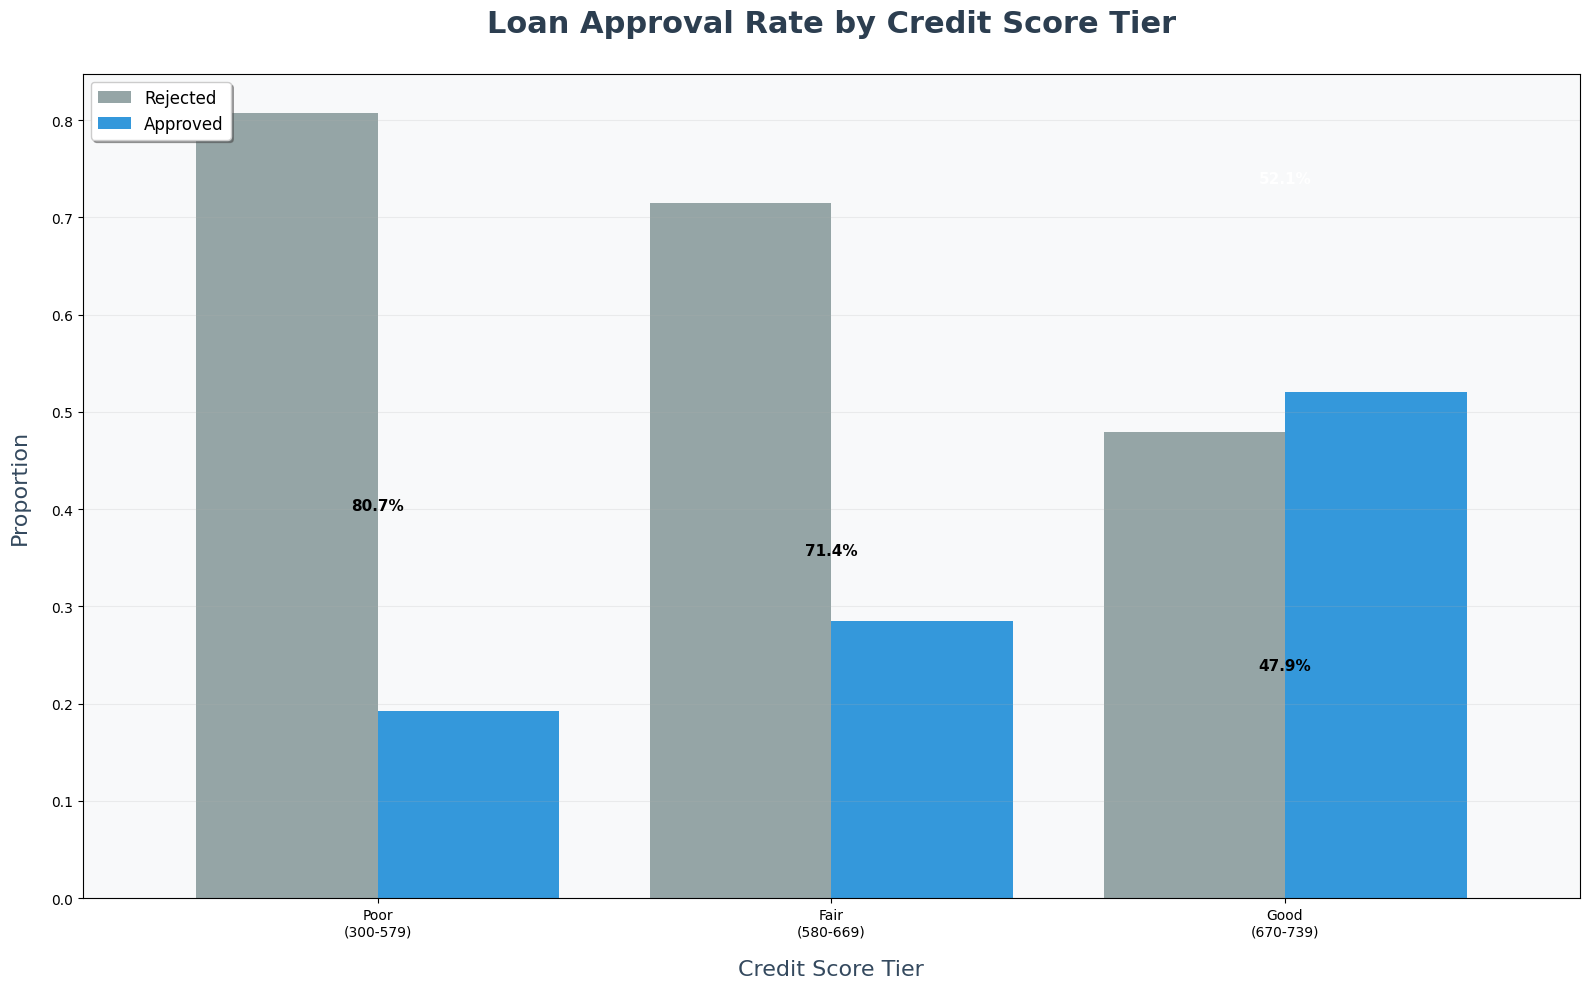

In [28]:
# Create credit score groups
credit_bins = [300, 580, 670, 740, 800, 850]
credit_labels = ['Poor\n(300-579)', 'Fair\n(580-669)', 'Good\n(670-739)', 'Very Good\n(740-799)', 'Excellent\n(800-850)']
df['CreditGroup'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=credit_labels)

approval_by_credit = pd.crosstab(df['CreditGroup'], df['LoanApproved'], normalize='index')

plt.figure(figsize=(16, 10))
colors = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60']
bars = approval_by_credit.plot(kind='bar', color=['#95a5a6', '#3498db'], 
                            figsize=(16, 10), width=0.8)

plt.title('Loan Approval Rate by Credit Score Tier', fontsize=22, fontweight='bold', 
          pad=30, color='#2c3e50', family='DejaVu Sans')
plt.xlabel('Credit Score Tier', fontsize=16, color='#34495e', family='DejaVu Sans', labelpad=15)
plt.ylabel('Proportion', fontsize=16, color='#34495e', family='DejaVu Sans', labelpad=15)

plt.legend(['Rejected', 'Approved'], frameon=True, fancybox=True, shadow=True, 
          fontsize=12, loc='upper left')

plt.gca().set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')
plt.grid(True, alpha=0.2, axis='y')

# Customize bars with gradient effect
for i, (idx, row) in enumerate(approval_by_credit.iterrows()):
    plt.text(i, row[0]/2, f'{row[0]:.1%}', ha='center', va='center', 
             fontweight='bold', color='black', fontsize=11, family='DejaVu Sans')
    plt.text(i, row[0] + row[1]/2, f'{row[1]:.1%}', ha='center', va='center', 
             fontweight='bold', color='white', fontsize=11, family='DejaVu Sans')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

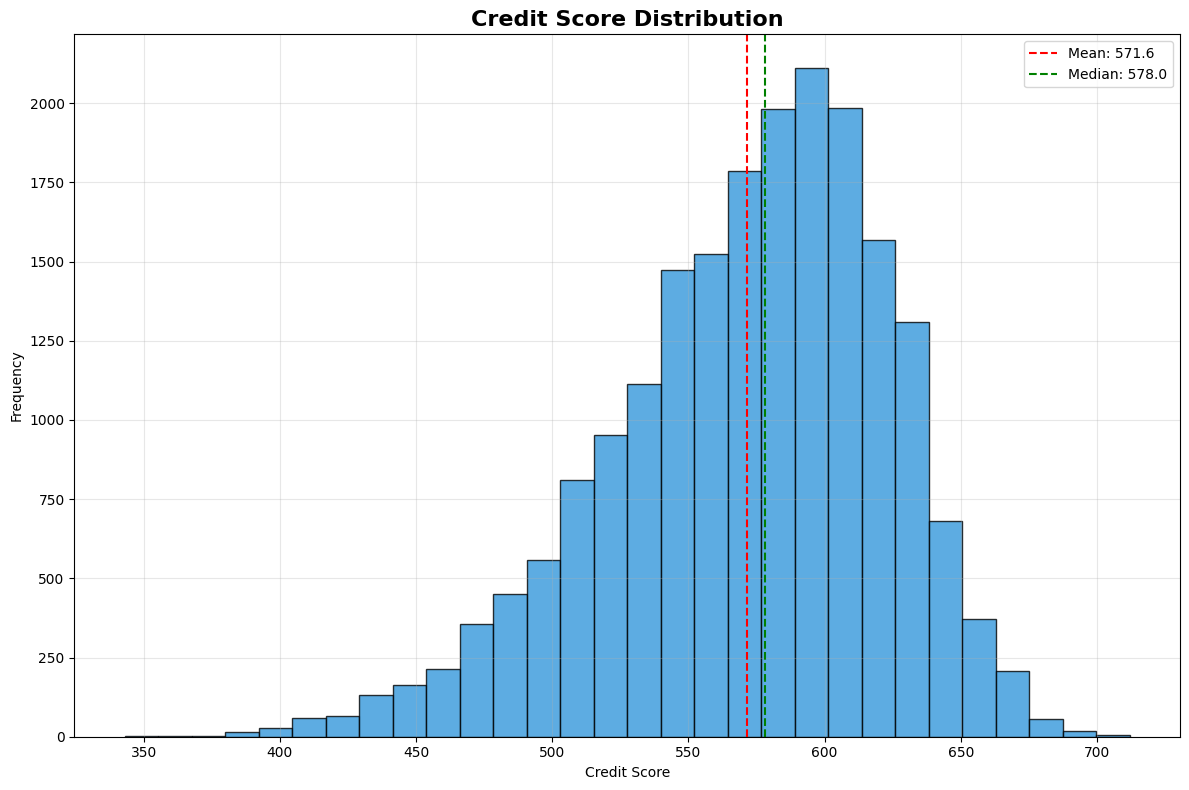

In [29]:
plt.figure(figsize=(12, 8))
plt.hist(df['CreditScore'], bins=30, color='#3498DB', edgecolor='black', alpha=0.8)
plt.title('Credit Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.axvline(df['CreditScore'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df["CreditScore"].mean():.1f}')
plt.axvline(df['CreditScore'].median(), color='green', linestyle='--', 
           label=f'Median: {df["CreditScore"].median():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

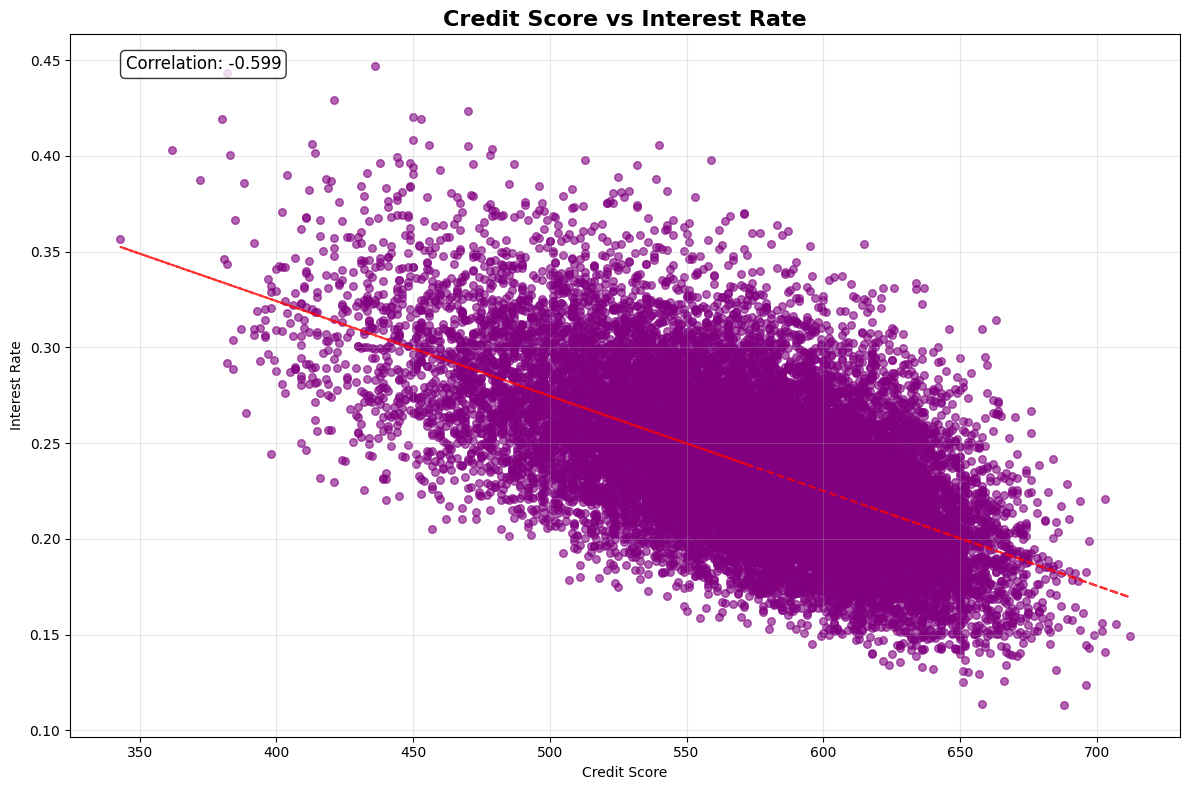

In [30]:
plt.figure(figsize=(12, 8))
plt.scatter(df['CreditScore'], df['InterestRate'], alpha=0.6, color='purple', s=30)
plt.title('Credit Score vs Interest Rate', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.grid(True, alpha=0.3)

# Add correlation line
z = np.polyfit(df['CreditScore'], df['InterestRate'], 1)
p = np.poly1d(z)
plt.plot(df['CreditScore'], p(df['CreditScore']), "r--", alpha=0.8)

correlation = df['CreditScore'].corr(df['InterestRate'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.tight_layout()
plt.show()

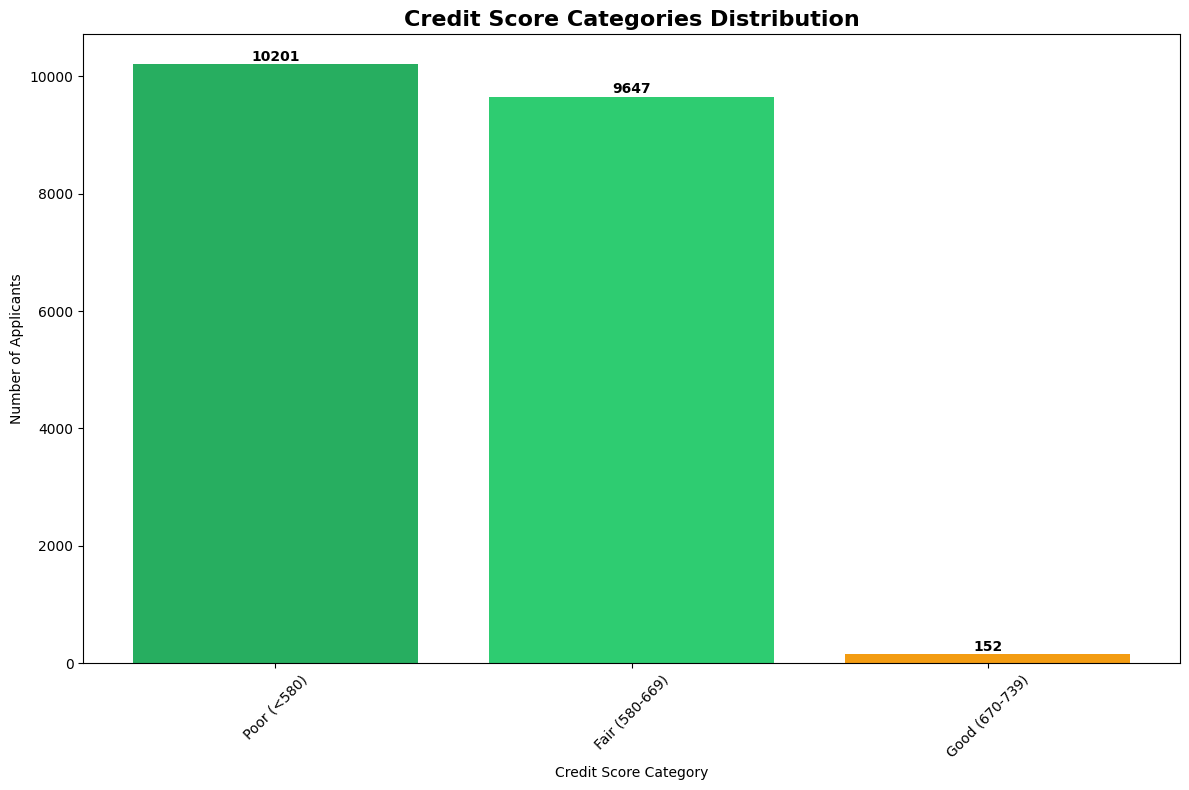

In [31]:
# Create credit score categories
def credit_score_category(score):
    if score >= 800:
        return 'Excellent (800+)'
    elif score >= 740:
        return 'Very Good (740-799)'
    elif score >= 670:
        return 'Good (670-739)'
    elif score >= 580:
        return 'Fair (580-669)'
    else:
        return 'Poor (<580)'

df['CreditCategory'] = df['CreditScore'].apply(credit_score_category)

plt.figure(figsize=(12, 8))
credit_counts = df['CreditCategory'].value_counts()
plt.bar(credit_counts.index, credit_counts.values, color=['#27AE60', '#2ECC71', '#F39C12', '#E67E22', '#E74C3C'])
plt.title('Credit Score Categories Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score Category')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
for i, v in enumerate(credit_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

In [32]:
print("CREDIT SCORE STATISTICS:")
print("=" * 50)
print(f"Mean Credit Score: {df['CreditScore'].mean():.2f}")
print(f"Median Credit Score: {df['CreditScore'].median():.2f}")
print(f"Standard Deviation: {df['CreditScore'].std():.2f}")
print(f"Minimum Credit Score: {df['CreditScore'].min()}")
print(f"Maximum Credit Score: {df['CreditScore'].max()}")
print(f"25th Percentile: {df['CreditScore'].quantile(0.25):.2f}")
print(f"75th Percentile: {df['CreditScore'].quantile(0.75):.2f}")

print("\nAPPROVAL RATES BY CREDIT SCORE CATEGORY:")
approval_rates = df.groupby('CreditCategory')['LoanApproved'].mean()
print(approval_rates.round(3))

CREDIT SCORE STATISTICS:
Mean Credit Score: 571.61
Median Credit Score: 578.00
Standard Deviation: 51.00
Minimum Credit Score: 343
Maximum Credit Score: 712
25th Percentile: 540.00
75th Percentile: 609.00

APPROVAL RATES BY CREDIT SCORE CATEGORY:
CreditCategory
Fair (580-669)    0.284
Good (670-739)    0.513
Poor (<580)       0.192
Name: LoanApproved, dtype: float64


## EmploymentStatus

In [33]:
df["EmploymentStatus"]

0        Employed
1        Employed
2        Employed
3        Employed
4        Employed
           ...   
19995    Employed
19996    Employed
19997    Employed
19998    Employed
19999    Employed
Name: EmploymentStatus, Length: 20000, dtype: object

In [34]:
df["EmploymentStatus"].describe()

count        20000
unique           3
top       Employed
freq         17036
Name: EmploymentStatus, dtype: object

In [35]:
age_distribution = df['EmploymentStatus'].value_counts().reset_index()
age_distribution.columns = ['EmploymentStatus', 'Count']
print(age_distribution)

  EmploymentStatus  Count
0         Employed  17036
1    Self-Employed   1573
2       Unemployed   1391


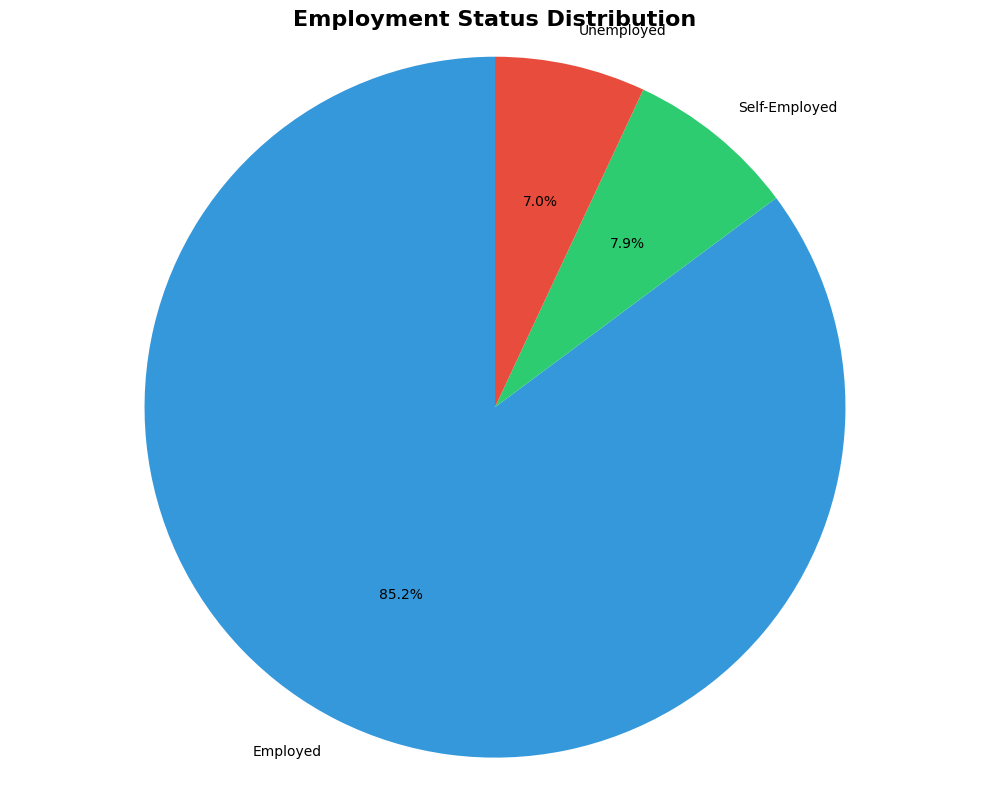

In [36]:
plt.figure(figsize=(10, 8))
employment_counts = df['EmploymentStatus'].value_counts()
colors = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12']

plt.pie(employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Employment Status Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

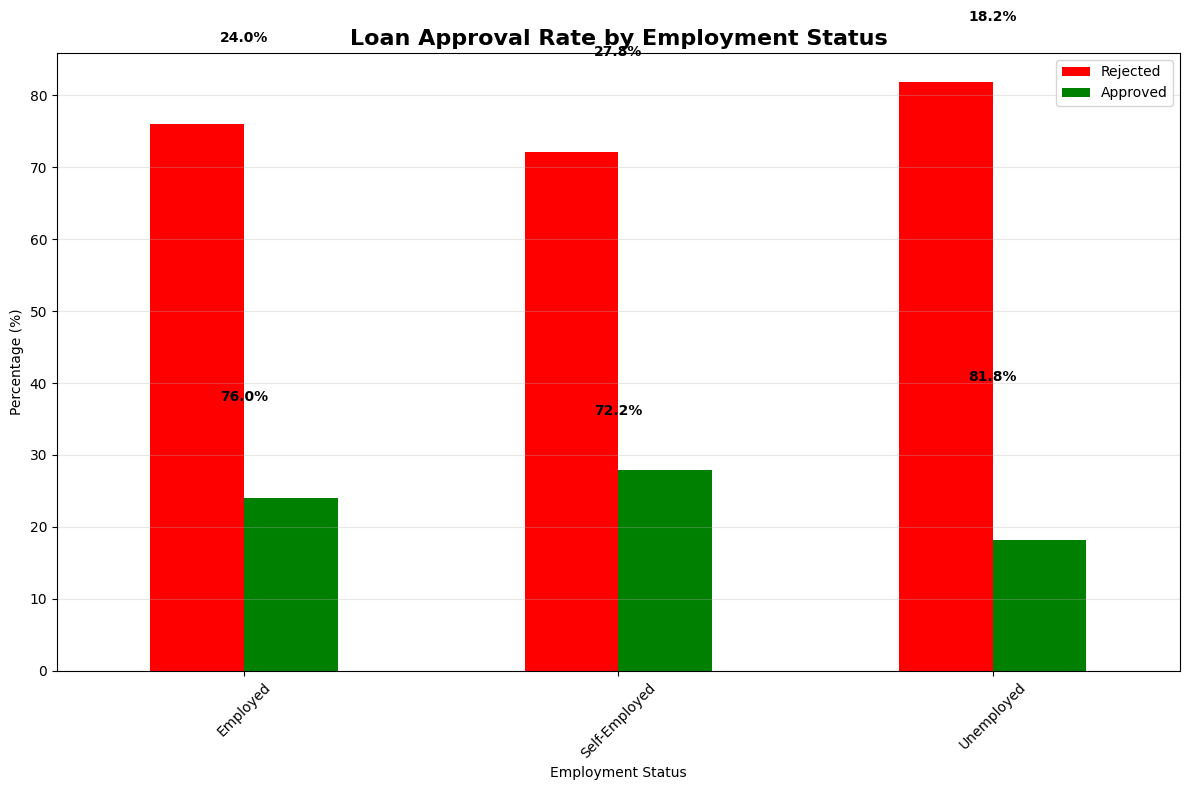

In [37]:
plt.figure(figsize=(12, 8))

# Create cross-tabulation
employment_approval = pd.crosstab(df['EmploymentStatus'], df['LoanApproved'], normalize='index') * 100

employment_approval.plot(kind='bar', color=['red', 'green'], figsize=(12, 8))
plt.title('Loan Approval Rate by Employment Status', fontsize=16, fontweight='bold')
plt.xlabel('Employment Status')
plt.ylabel('Percentage (%)')
plt.legend(['Rejected', 'Approved'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (idx, row) in enumerate(employment_approval.iterrows()):
    plt.text(i, row[0]/2, f'{row[0]:.1f}%', ha='center', va='center', fontweight='bold', color='black')
    plt.text(i, row[0] + row[1]/2, f'{row[1]:.1f}%', ha='center', va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

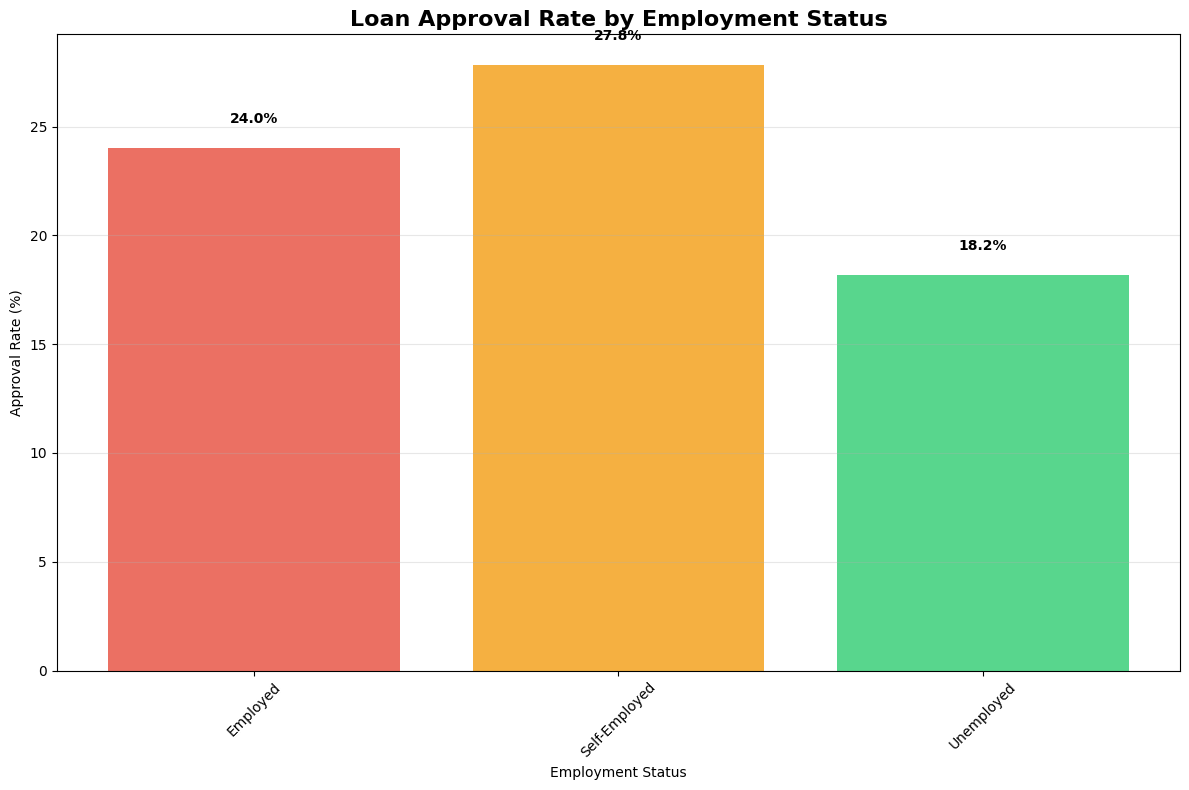

In [38]:
plt.figure(figsize=(12, 8))
approval_rates = df.groupby('EmploymentStatus')['LoanApproved'].mean() * 100

plt.bar(approval_rates.index, approval_rates.values, color=['#E74C3C', '#F39C12', '#2ECC71', '#3498DB'], alpha=0.8)
plt.title('Loan Approval Rate by Employment Status', fontsize=16, fontweight='bold')
plt.xlabel('Employment Status')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)

# Add percentage labels
for i, v in enumerate(approval_rates.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

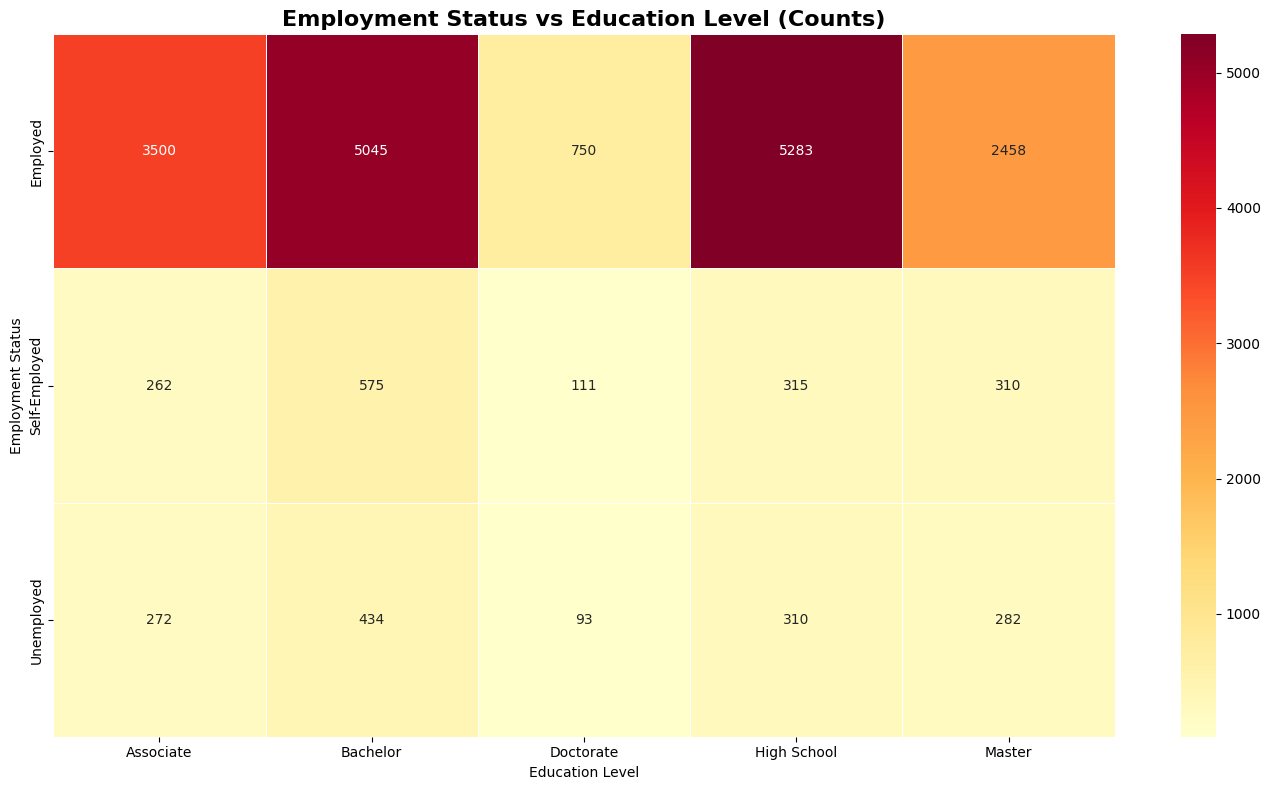

In [39]:
# Create cross-tabulation with education
edu_employment = pd.crosstab(df['EmploymentStatus'], df['EducationLevel'])

plt.figure(figsize=(14, 8))
sns.heatmap(edu_employment, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Employment Status vs Education Level (Counts)', fontsize=16, fontweight='bold')
plt.xlabel('Education Level')
plt.ylabel('Employment Status')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

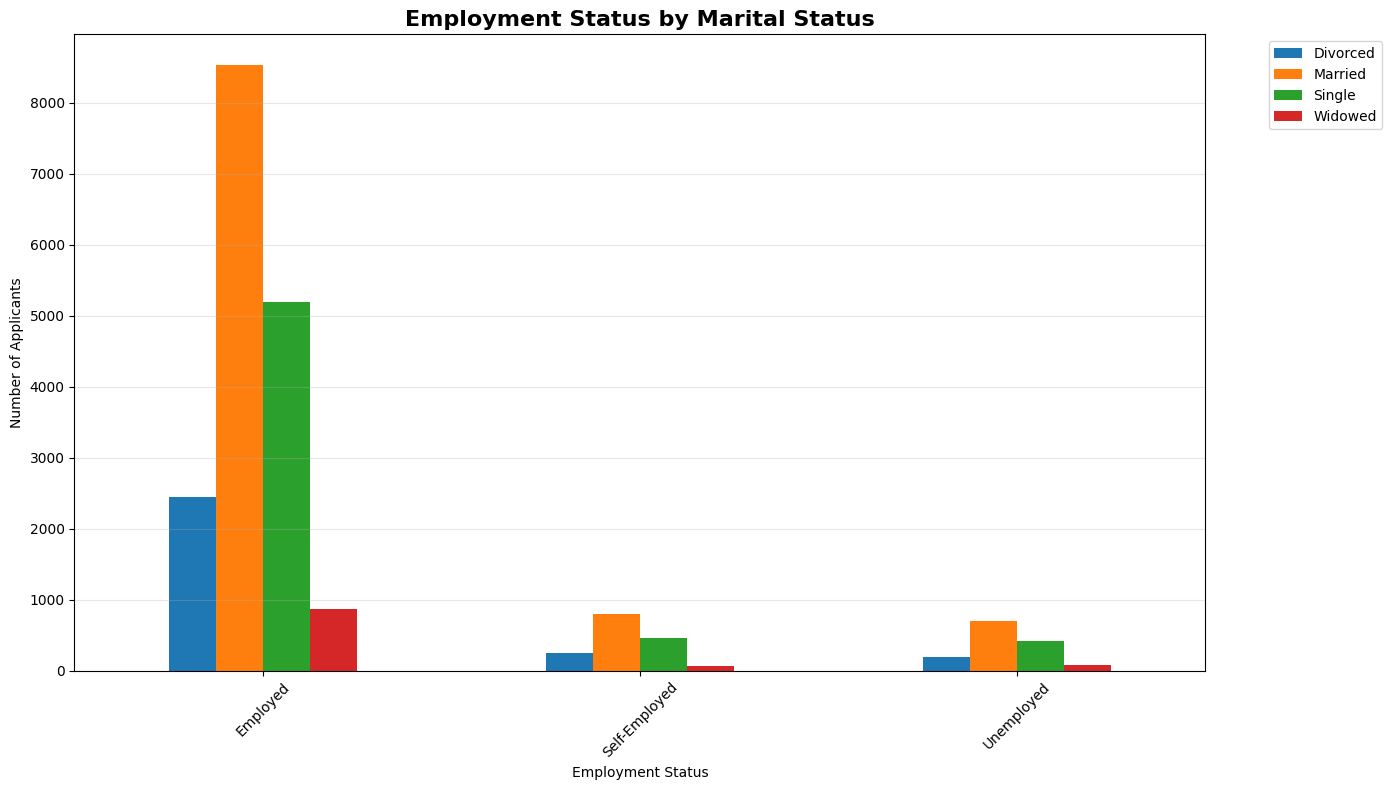

In [40]:
plt.figure(figsize=(14, 8))
marital_employment = pd.crosstab(df['EmploymentStatus'], df['MaritalStatus'])

marital_employment.plot(kind='bar', figsize=(14, 8))
plt.title('Employment Status by Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Employment Status')
plt.ylabel('Number of Applicants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
print("EMPLOYMENT STATUS STATISTICS:")
print("=" * 60)

employment_stats = df.groupby('EmploymentStatus').agg({
    'AnnualIncome': ['mean', 'median', 'std'],
    'CreditScore': ['mean', 'median'],
    'LoanAmount': ['mean', 'median'],
    'LoanApproved': 'mean',
    'RiskScore': 'mean'
}).round(2)

print(employment_stats)

print("\nAPPROVAL RATES BY EMPLOYMENT STATUS:")
approval_rates = df.groupby('EmploymentStatus')['LoanApproved'].mean().sort_values(ascending=False)
for status, rate in approval_rates.items():
    print(f"{status}: {rate:.1%}")

EMPLOYMENT STATUS STATISTICS:
                 AnnualIncome                    CreditScore         \
                         mean   median       std        mean median   
EmploymentStatus                                                      
Employed             58892.74  48319.5  40397.38      571.15  578.0   
Self-Employed        61124.19  50740.0  40133.69      575.03  581.0   
Unemployed           60233.18  49533.0  39973.19      573.38  582.0   

                 LoanAmount          LoanApproved RiskScore  
                       mean   median         mean      mean  
EmploymentStatus                                             
Employed           24842.67  21925.5         0.24     50.35  
Self-Employed      24822.49  21706.0         0.28     52.46  
Unemployed         25443.50  22219.0         0.18     53.95  

APPROVAL RATES BY EMPLOYMENT STATUS:
Self-Employed: 27.8%
Employed: 24.0%
Unemployed: 18.2%


## EducationLevel

In [42]:
df["EducationLevel"]

0             Master
1          Associate
2           Bachelor
3        High School
4          Associate
            ...     
19995    High School
19996      Associate
19997       Bachelor
19998    High School
19999      Associate
Name: EducationLevel, Length: 20000, dtype: object

In [43]:
df = df.drop("EducationLevel", axis=1)

In [44]:
df

,AnnualIncome,CreditScore,EmploymentStatus,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory
0,39948,617,Employed,22,13152,48,Married,2,Own,183,...,0.199652,0.227590,419.805992,0.181077,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
1,39709,628,Employed,15,26045,48,Single,1,Mortgage,496,...,0.207045,0.201077,794.054238,0.389852,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
2,40724,570,Employed,26,17627,36,Married,2,Rent,902,...,0.217627,0.212548,666.406688,0.462157,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580)
3,69084,545,Employed,34,37898,96,Single,1,Mortgage,755,...,0.300398,0.300911,1047.506980,0.313098,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580)
4,103264,594,Employed,17,9184,36,Married,1,Mortgage,274,...,0.197184,0.175990,330.179140,0.070210,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,19,24521,36,Married,3,Rent,673,...,0.216021,0.195574,905.767712,0.627741,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
19996,49246,567,Employed,33,25818,36,Married,5,Rent,414,...,0.227318,0.199168,958.395633,0.334418,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580)
19997,48958,645,Employed,20,37033,72,Married,3,Mortgage,512,...,0.229533,0.226766,945.427454,0.357227,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
19998,41025,560,Employed,36,14760,72,Married,3,Own,986,...,0.249760,0.264873,411.168284,0.408678,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580)


## Experience

In [45]:
df["Experience"]

0        22
1        15
2        26
3        34
4        17
         ..
19995    19
19996    33
19997    20
19998    36
19999     0
Name: Experience, Length: 20000, dtype: int64

In [46]:
df = df.drop("Experience", axis=1)

In [47]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory
0,39948,617,Employed,13152,48,Married,2,Own,183,0.354418,...,0.199652,0.227590,419.805992,0.181077,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
1,39709,628,Employed,26045,48,Single,1,Mortgage,496,0.087827,...,0.207045,0.201077,794.054238,0.389852,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
2,40724,570,Employed,17627,36,Married,2,Rent,902,0.137414,...,0.217627,0.212548,666.406688,0.462157,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580)
3,69084,545,Employed,37898,96,Single,1,Mortgage,755,0.267587,...,0.300398,0.300911,1047.506980,0.313098,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580)
4,103264,594,Employed,9184,36,Married,1,Mortgage,274,0.320535,...,0.197184,0.175990,330.179140,0.070210,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Married,3,Rent,673,0.101288,...,0.216021,0.195574,905.767712,0.627741,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
19996,49246,567,Employed,25818,36,Married,5,Rent,414,0.471818,...,0.227318,0.199168,958.395633,0.334418,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580)
19997,48958,645,Employed,37033,72,Married,3,Mortgage,512,0.216596,...,0.229533,0.226766,945.427454,0.357227,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
19998,41025,560,Employed,14760,72,Married,3,Own,986,0.364758,...,0.249760,0.264873,411.168284,0.408678,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580)


## LoanAmount

In [48]:
df["LoanAmount"]

0        13152
1        26045
2        17627
3        37898
4         9184
         ...  
19995    24521
19996    25818
19997    37033
19998    14760
19999    32055
Name: LoanAmount, Length: 20000, dtype: int64

In [49]:
df["LoanAmount"].describe()

count     20000.000000
mean      24882.867800
std       13427.421217
min        3674.000000
25%       15575.000000
50%       21914.500000
75%       30835.000000
max      184732.000000
Name: LoanAmount, dtype: float64

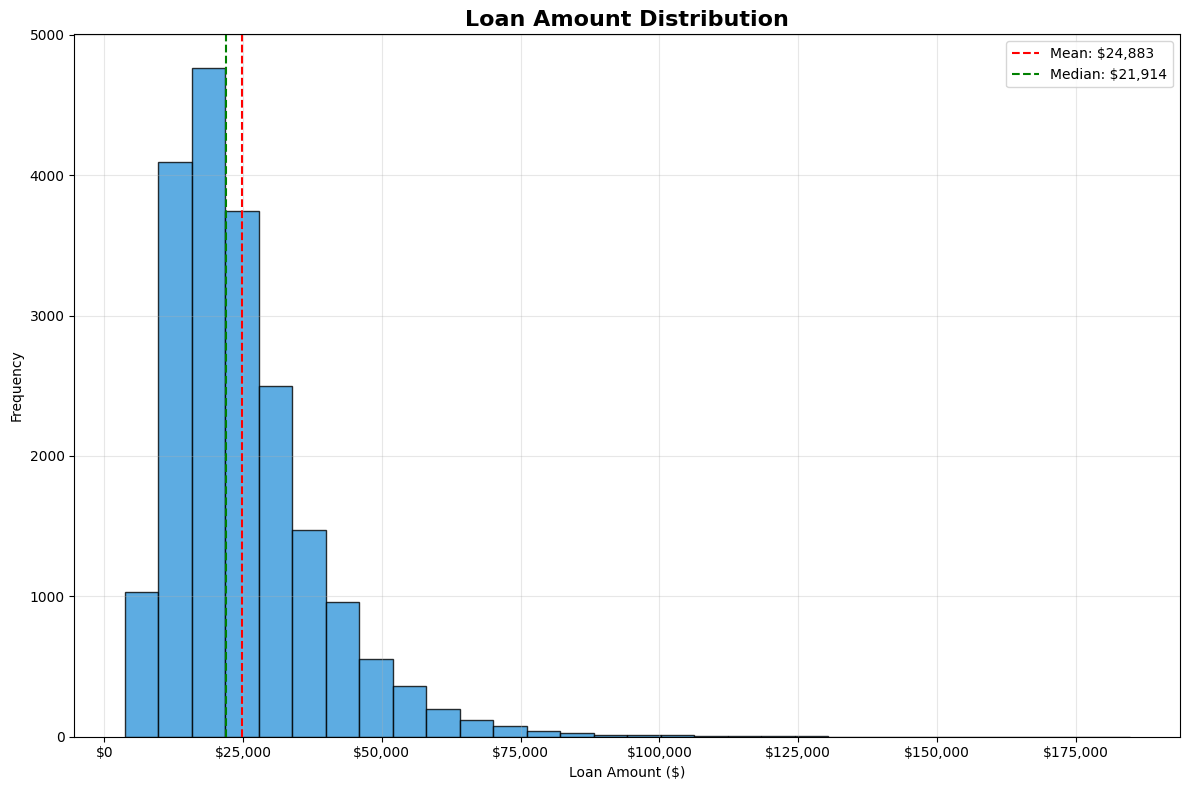

In [51]:
plt.figure(figsize=(12, 8))
plt.hist(df['LoanAmount'], bins=30, color='#3498DB', alpha=0.8, edgecolor='black')
plt.title('Loan Amount Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.axvline(df['LoanAmount'].mean(), color='red', linestyle='--', label=f'Mean: ${df["LoanAmount"].mean():,.0f}')
plt.axvline(df['LoanAmount'].median(), color='green', linestyle='--', label=f'Median: ${df["LoanAmount"].median():,.0f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

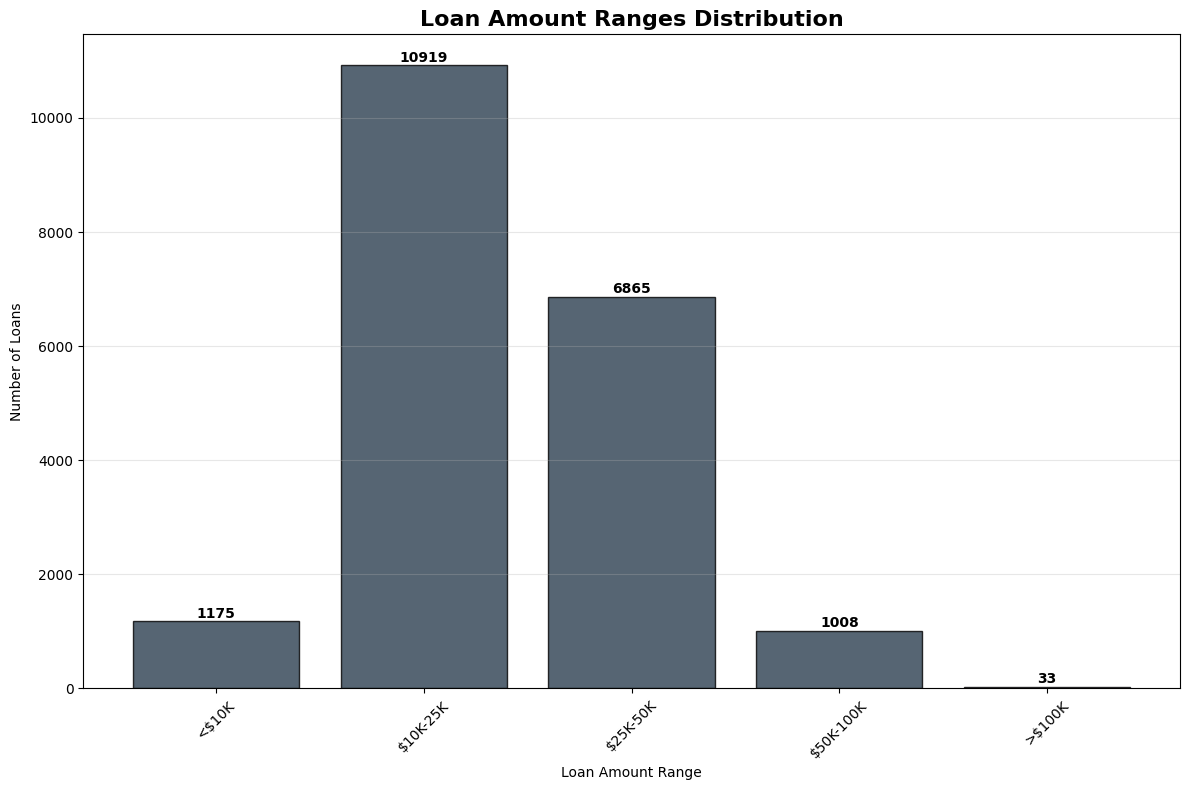

In [52]:
plt.figure(figsize=(12, 8))
loan_ranges = pd.cut(df['LoanAmount'], bins=[0, 10000, 25000, 50000, 100000, df['LoanAmount'].max()], 
                    labels=['<$10K', '$10K-25K', '$25K-50K', '$50K-100K', '>$100K'])
loan_range_counts = loan_ranges.value_counts().sort_index()

plt.bar(loan_range_counts.index, loan_range_counts.values, color='#2C3E50', alpha=0.8, edgecolor='black')
plt.title('Loan Amount Ranges Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount Range')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)

# Add count labels
for i, v in enumerate(loan_range_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
print("LOAN AMOUNT STATISTICS:")
print("=" * 50)
print(f"Mean Loan Amount: ${df['LoanAmount'].mean():,.2f}")
print(f"Median Loan Amount: ${df['LoanAmount'].median():,.2f}")
print(f"Standard Deviation: ${df['LoanAmount'].std():,.2f}")
print(f"Minimum Loan Amount: ${df['LoanAmount'].min():,.2f}")
print(f"Maximum Loan Amount: ${df['LoanAmount'].max():,.2f}")
print(f"25th Percentile: ${df['LoanAmount'].quantile(0.25):,.2f}")
print(f"75th Percentile: ${df['LoanAmount'].quantile(0.75):,.2f}")

print("\nAVERAGE LOAN AMOUNT BY PURPOSE:")
purpose_avg = df.groupby('LoanPurpose')['LoanAmount'].mean().sort_values(ascending=False)
for purpose, amount in purpose_avg.items():
    print(f"{purpose}: ${amount:,.2f}")

LOAN AMOUNT STATISTICS:
Mean Loan Amount: $24,882.87
Median Loan Amount: $21,914.50
Standard Deviation: $13,427.42
Minimum Loan Amount: $3,674.00
Maximum Loan Amount: $184,732.00
25th Percentile: $15,575.00
75th Percentile: $30,835.00

AVERAGE LOAN AMOUNT BY PURPOSE:
Education: $25,063.66
Auto: $24,945.48
Other: $24,860.34
Home: $24,825.60
Debt Consolidation: $24,800.93


## LoanDuration

In [54]:
df["LoanDuration"]

0        48
1        48
2        36
3        96
4        36
         ..
19995    36
19996    36
19997    72
19998    72
19999    48
Name: LoanDuration, Length: 20000, dtype: int64

In [55]:
df["LoanDuration"].describe()

count    20000.000000
mean        54.057000
std         24.664857
min         12.000000
25%         36.000000
50%         48.000000
75%         72.000000
max        120.000000
Name: LoanDuration, dtype: float64

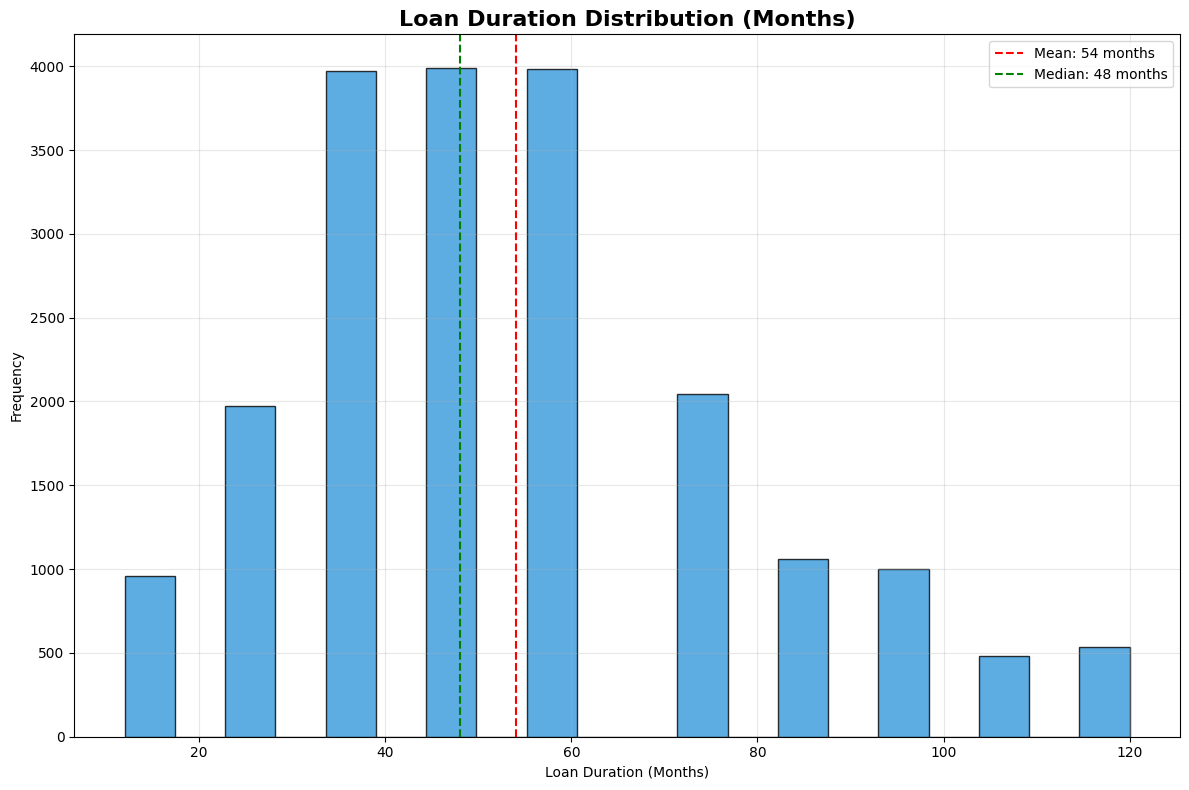

In [56]:
plt.figure(figsize=(12, 8))
plt.hist(df['LoanDuration'], bins=20, color='#3498DB', alpha=0.8, edgecolor='black')
plt.title('Loan Duration Distribution (Months)', fontsize=16, fontweight='bold')
plt.xlabel('Loan Duration (Months)')
plt.ylabel('Frequency')
plt.axvline(df['LoanDuration'].mean(), color='red', linestyle='--', label=f'Mean: {df["LoanDuration"].mean():.0f} months')
plt.axvline(df['LoanDuration'].median(), color='green', linestyle='--', label=f'Median: {df["LoanDuration"].median():.0f} months')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [57]:
print("LOAN DURATION STATISTICS:")
print("=" * 50)
print(f"Mean Loan Duration: {df['LoanDuration'].mean():.1f} months ({df['LoanDuration'].mean()/12:.1f} years)")
print(f"Median Loan Duration: {df['LoanDuration'].median():.1f} months ({df['LoanDuration'].median()/12:.1f} years)")
print(f"Standard Deviation: {df['LoanDuration'].std():.1f} months")
print(f"Minimum Duration: {df['LoanDuration'].min()} months")
print(f"Maximum Duration: {df['LoanDuration'].max()} months")
print(f"25th Percentile: {df['LoanDuration'].quantile(0.25):.0f} months")
print(f"75th Percentile: {df['LoanDuration'].quantile(0.75):.0f} months")

print("\nAVERAGE LOAN DURATION BY PURPOSE:")
purpose_duration = df.groupby('LoanPurpose')['LoanDuration'].mean().sort_values(ascending=False)
for purpose, duration in purpose_duration.items():
    print(f"{purpose}: {duration:.1f} months ({duration/12:.1f} years)")

LOAN DURATION STATISTICS:
Mean Loan Duration: 54.1 months (4.5 years)
Median Loan Duration: 48.0 months (4.0 years)
Standard Deviation: 24.7 months
Minimum Duration: 12 months
Maximum Duration: 120 months
25th Percentile: 36 months
75th Percentile: 72 months

AVERAGE LOAN DURATION BY PURPOSE:
Auto: 54.9 months (4.6 years)
Home: 54.0 months (4.5 years)
Other: 54.0 months (4.5 years)
Debt Consolidation: 53.8 months (4.5 years)
Education: 53.6 months (4.5 years)


## MaritalStatus               

In [58]:
df["MaritalStatus"]

0        Married
1         Single
2        Married
3         Single
4        Married
          ...   
19995    Married
19996    Married
19997    Married
19998    Married
19999    Married
Name: MaritalStatus, Length: 20000, dtype: object

In [59]:
df = df.drop("MaritalStatus", axis=1)

In [60]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory
0,39948,617,Employed,13152,48,2,Own,183,0.354418,1,...,0.199652,0.227590,419.805992,0.181077,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
1,39709,628,Employed,26045,48,1,Mortgage,496,0.087827,5,...,0.207045,0.201077,794.054238,0.389852,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
2,40724,570,Employed,17627,36,2,Rent,902,0.137414,2,...,0.217627,0.212548,666.406688,0.462157,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580)
3,69084,545,Employed,37898,96,1,Mortgage,755,0.267587,2,...,0.300398,0.300911,1047.506980,0.313098,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580)
4,103264,594,Employed,9184,36,1,Mortgage,274,0.320535,0,...,0.197184,0.175990,330.179140,0.070210,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,3,Rent,673,0.101288,5,...,0.216021,0.195574,905.767712,0.627741,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
19996,49246,567,Employed,25818,36,5,Rent,414,0.471818,2,...,0.227318,0.199168,958.395633,0.334418,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580)
19997,48958,645,Employed,37033,72,3,Mortgage,512,0.216596,3,...,0.229533,0.226766,945.427454,0.357227,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
19998,41025,560,Employed,14760,72,3,Own,986,0.364758,4,...,0.249760,0.264873,411.168284,0.408678,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580)


## NumberOfDependents

In [61]:
df["NumberOfDependents"]

0        2
1        1
2        2
3        1
4        1
        ..
19995    3
19996    5
19997    3
19998    3
19999    0
Name: NumberOfDependents, Length: 20000, dtype: int64

In [62]:
df = df.drop("NumberOfDependents", axis=1)

In [63]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory
0,39948,617,Employed,13152,48,Own,183,0.354418,1,2,...,0.199652,0.227590,419.805992,0.181077,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
1,39709,628,Employed,26045,48,Mortgage,496,0.087827,5,3,...,0.207045,0.201077,794.054238,0.389852,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
2,40724,570,Employed,17627,36,Rent,902,0.137414,2,0,...,0.217627,0.212548,666.406688,0.462157,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580)
3,69084,545,Employed,37898,96,Mortgage,755,0.267587,2,1,...,0.300398,0.300911,1047.506980,0.313098,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580)
4,103264,594,Employed,9184,36,Mortgage,274,0.320535,0,0,...,0.197184,0.175990,330.179140,0.070210,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,673,0.101288,5,1,...,0.216021,0.195574,905.767712,0.627741,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
19996,49246,567,Employed,25818,36,Rent,414,0.471818,2,0,...,0.227318,0.199168,958.395633,0.334418,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580)
19997,48958,645,Employed,37033,72,Mortgage,512,0.216596,3,1,...,0.229533,0.226766,945.427454,0.357227,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669)
19998,41025,560,Employed,14760,72,Own,986,0.364758,4,1,...,0.249760,0.264873,411.168284,0.408678,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580)


## HomeOwnershipStatus

In [64]:
df["HomeOwnershipStatus"]

0             Own
1        Mortgage
2            Rent
3        Mortgage
4        Mortgage
           ...   
19995        Rent
19996        Rent
19997    Mortgage
19998         Own
19999         Own
Name: HomeOwnershipStatus, Length: 20000, dtype: object

In [65]:
df["HomeOwnershipStatus"].describe()

count        20000
unique           4
top       Mortgage
freq          7939
Name: HomeOwnershipStatus, dtype: object

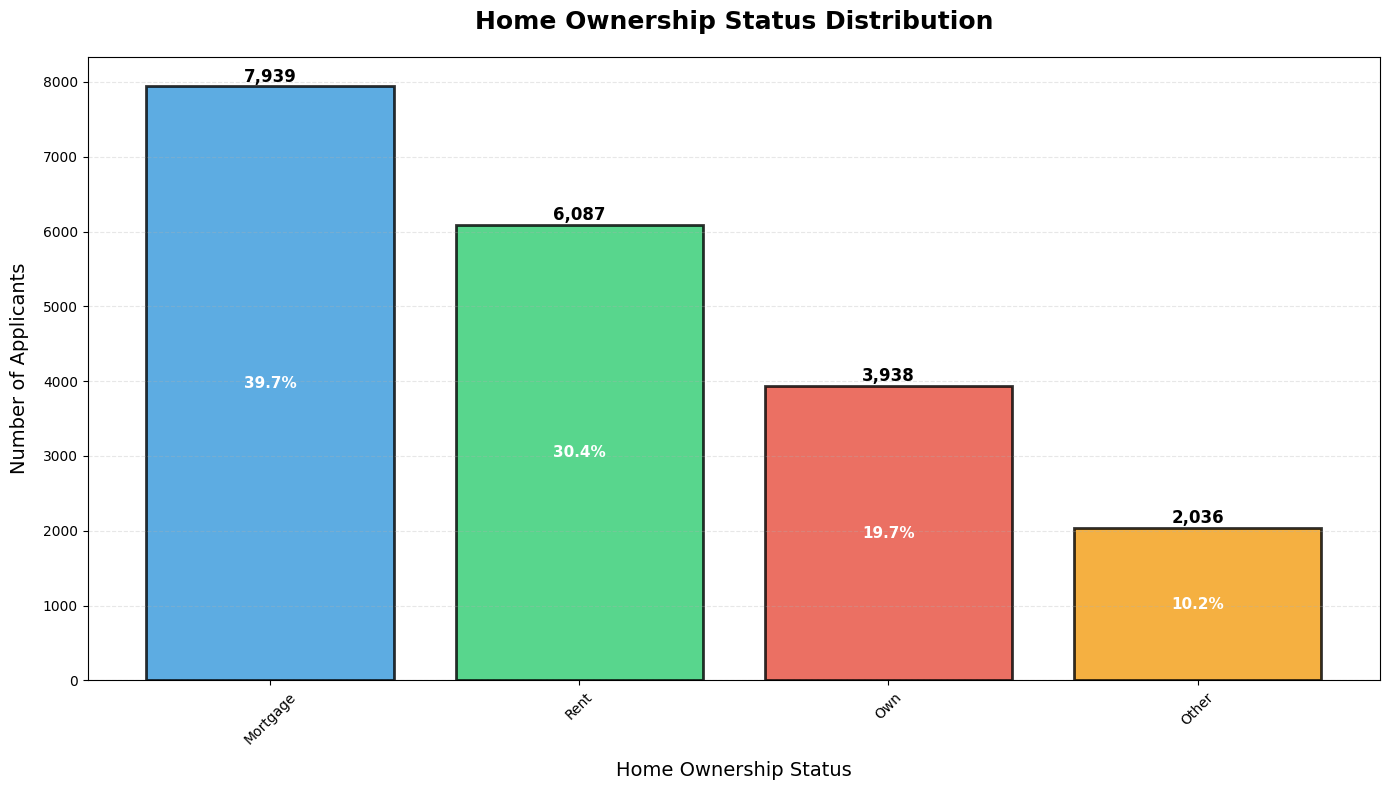

In [66]:
plt.figure(figsize=(14, 8))
home_counts = df['HomeOwnershipStatus'].value_counts()
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

bars = plt.bar(home_counts.index, home_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.title('Home Ownership Status Distribution', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Home Ownership Status', fontsize=14, labelpad=10)
plt.ylabel('Number of Applicants', fontsize=14, labelpad=10)

# Add clear count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height:,}', ha='center', va='bottom', 
             fontweight='bold', fontsize=12, color='black')

# Add percentage labels inside bars
total = len(df)
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{percentage:.1f}%', ha='center', va='center', 
             fontweight='bold', fontsize=11, color='white')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## MonthlyDebtPayments         

In [67]:
df["MonthlyDebtPayments"]

0        183
1        496
2        902
3        755
4        274
        ... 
19995    673
19996    414
19997    512
19998    986
19999    272
Name: MonthlyDebtPayments, Length: 20000, dtype: int64

In [68]:
df["MonthlyDebtPayments"].describe()

count    20000.000000
mean       454.292700
std        240.507609
min         50.000000
25%        286.000000
50%        402.000000
75%        564.000000
max       2919.000000
Name: MonthlyDebtPayments, dtype: float64

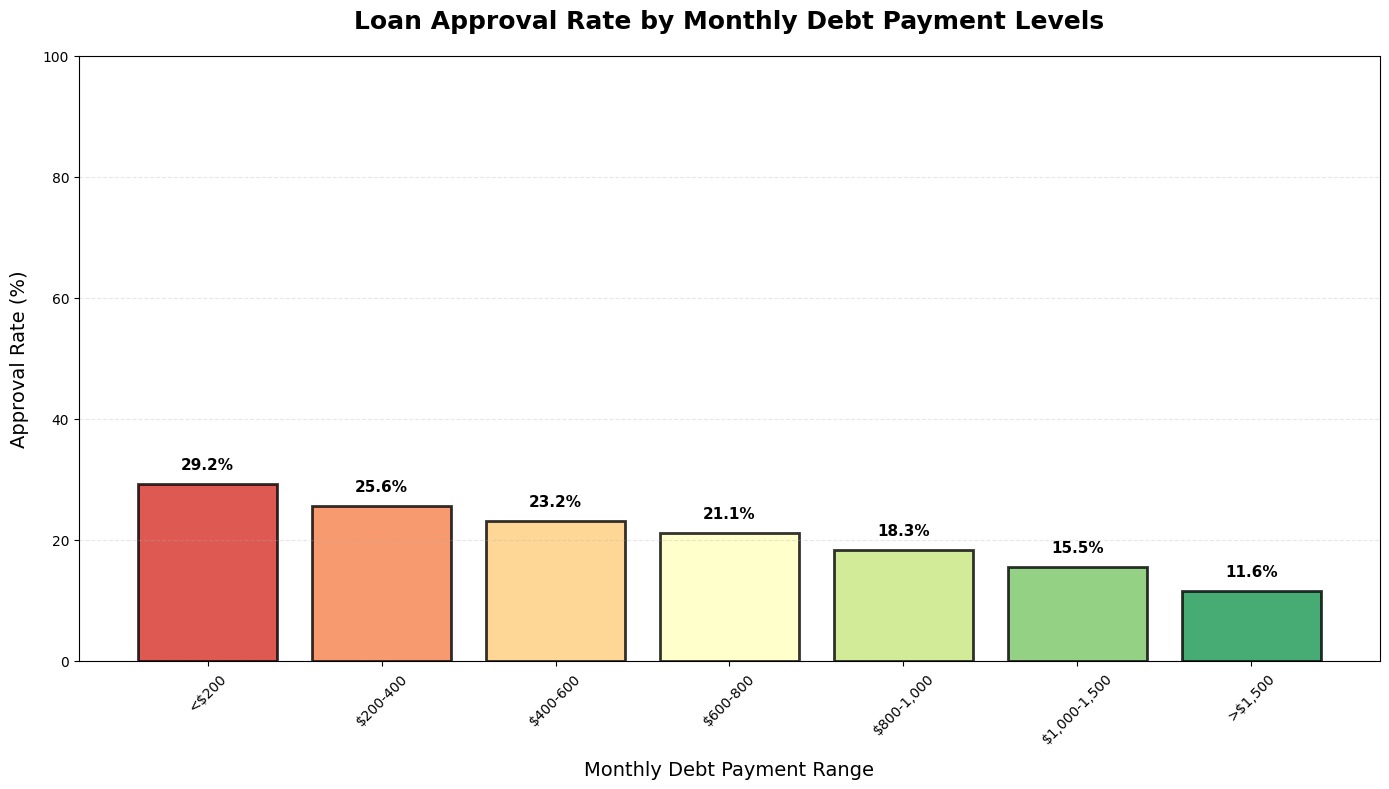

In [69]:
plt.figure(figsize=(14, 8))

# Create meaningful debt payment ranges
debt_bins = [0, 200, 400, 600, 800, 1000, 1500, df['MonthlyDebtPayments'].max()]
debt_labels = ['<$200', '$200-400', '$400-600', '$600-800', '$800-1,000', '$1,000-1,500', '>$1,500']
df['DebtRange'] = pd.cut(df['MonthlyDebtPayments'], bins=debt_bins, labels=debt_labels)

approval_by_debt = df.groupby('DebtRange')['LoanApproved'].mean() * 100

colors = plt.cm.RdYlGn(np.linspace(0.1, 0.9, len(approval_by_debt)))
bars = plt.bar(approval_by_debt.index, approval_by_debt.values, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.title('Loan Approval Rate by Monthly Debt Payment Levels', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Monthly Debt Payment Range', fontsize=14, labelpad=10)
plt.ylabel('Approval Rate (%)', fontsize=14, labelpad=10)
plt.ylim(0, 100)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11, color='black')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
df = df.drop("MonthlyDebtPayments", axis=1)

In [71]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange
0,39948,617,Employed,13152,48,Own,0.354418,1,2,0.358336,...,0.227590,419.805992,0.181077,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200
1,39709,628,Employed,26045,48,Mortgage,0.087827,5,3,0.330274,...,0.201077,794.054238,0.389852,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
2,40724,570,Employed,17627,36,Rent,0.137414,2,0,0.244729,...,0.212548,666.406688,0.462157,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"
3,69084,545,Employed,37898,96,Mortgage,0.267587,2,1,0.436244,...,0.300911,1047.506980,0.313098,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800
4,103264,594,Employed,9184,36,Mortgage,0.320535,0,0,0.078884,...,0.175990,330.179140,0.070210,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.101288,5,1,0.468077,...,0.195574,905.767712,0.627741,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800
19996,49246,567,Employed,25818,36,Rent,0.471818,2,0,0.317372,...,0.199168,958.395633,0.334418,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600
19997,48958,645,Employed,37033,72,Mortgage,0.216596,3,1,0.023014,...,0.226766,945.427454,0.357227,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
19998,41025,560,Employed,14760,72,Own,0.364758,4,1,0.534517,...,0.264873,411.168284,0.408678,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"


## CreditCardUtilizationRate   

In [72]:
df["CreditCardUtilizationRate"]*100

0        35.441792
1         8.782697
2        13.741410
3        26.758714
4        32.053532
           ...    
19995    10.128787
19996    47.181765
19997    21.659619
19998    36.475770
19999    53.641050
Name: CreditCardUtilizationRate, Length: 20000, dtype: float64

In [73]:
df = df.drop("CreditCardUtilizationRate", axis=1)

In [74]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange
0,39948,617,Employed,13152,48,Own,1,2,0.358336,0,...,0.227590,419.805992,0.181077,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200
1,39709,628,Employed,26045,48,Mortgage,5,3,0.330274,0,...,0.201077,794.054238,0.389852,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
2,40724,570,Employed,17627,36,Rent,2,0,0.244729,0,...,0.212548,666.406688,0.462157,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"
3,69084,545,Employed,37898,96,Mortgage,2,1,0.436244,0,...,0.300911,1047.506980,0.313098,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800
4,103264,594,Employed,9184,36,Mortgage,0,0,0.078884,0,...,0.175990,330.179140,0.070210,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,5,1,0.468077,0,...,0.195574,905.767712,0.627741,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800
19996,49246,567,Employed,25818,36,Rent,2,0,0.317372,0,...,0.199168,958.395633,0.334418,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600
19997,48958,645,Employed,37033,72,Mortgage,3,1,0.023014,0,...,0.226766,945.427454,0.357227,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
19998,41025,560,Employed,14760,72,Own,4,1,0.534517,0,...,0.264873,411.168284,0.408678,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"


## NumberOfOpenCreditLines     

In [75]:
df["NumberOfOpenCreditLines"]

0        1
1        5
2        2
3        2
4        0
        ..
19995    5
19996    2
19997    3
19998    4
19999    3
Name: NumberOfOpenCreditLines, Length: 20000, dtype: int64

In [76]:
df = df.drop("NumberOfOpenCreditLines", axis=1)

In [77]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange
0,39948,617,Employed,13152,48,Own,2,0.358336,0,Home,...,0.227590,419.805992,0.181077,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200
1,39709,628,Employed,26045,48,Mortgage,3,0.330274,0,Debt Consolidation,...,0.201077,794.054238,0.389852,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
2,40724,570,Employed,17627,36,Rent,0,0.244729,0,Education,...,0.212548,666.406688,0.462157,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"
3,69084,545,Employed,37898,96,Mortgage,1,0.436244,0,Home,...,0.300911,1047.506980,0.313098,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800
4,103264,594,Employed,9184,36,Mortgage,0,0.078884,0,Debt Consolidation,...,0.175990,330.179140,0.070210,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,1,0.468077,0,Auto,...,0.195574,905.767712,0.627741,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800
19996,49246,567,Employed,25818,36,Rent,0,0.317372,0,Debt Consolidation,...,0.199168,958.395633,0.334418,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600
19997,48958,645,Employed,37033,72,Mortgage,1,0.023014,0,Home,...,0.226766,945.427454,0.357227,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
19998,41025,560,Employed,14760,72,Own,1,0.534517,0,Debt Consolidation,...,0.264873,411.168284,0.408678,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"


## NumberOfCreditInquiries     

In [78]:
df["NumberOfCreditInquiries"]

0        2
1        3
2        0
3        1
4        0
        ..
19995    1
19996    0
19997    1
19998    1
19999    1
Name: NumberOfCreditInquiries, Length: 20000, dtype: int64

In [79]:
age_distribution = df['NumberOfCreditInquiries'].value_counts().reset_index()
age_distribution.columns = ['NumberOfCreditInquiries', 'Count']
print(age_distribution)

   NumberOfCreditInquiries  Count
0                        1   7506
1                        0   7299
2                        2   3666
3                        3   1185
4                        4    272
5                        5     56
6                        6     13
7                        7      3


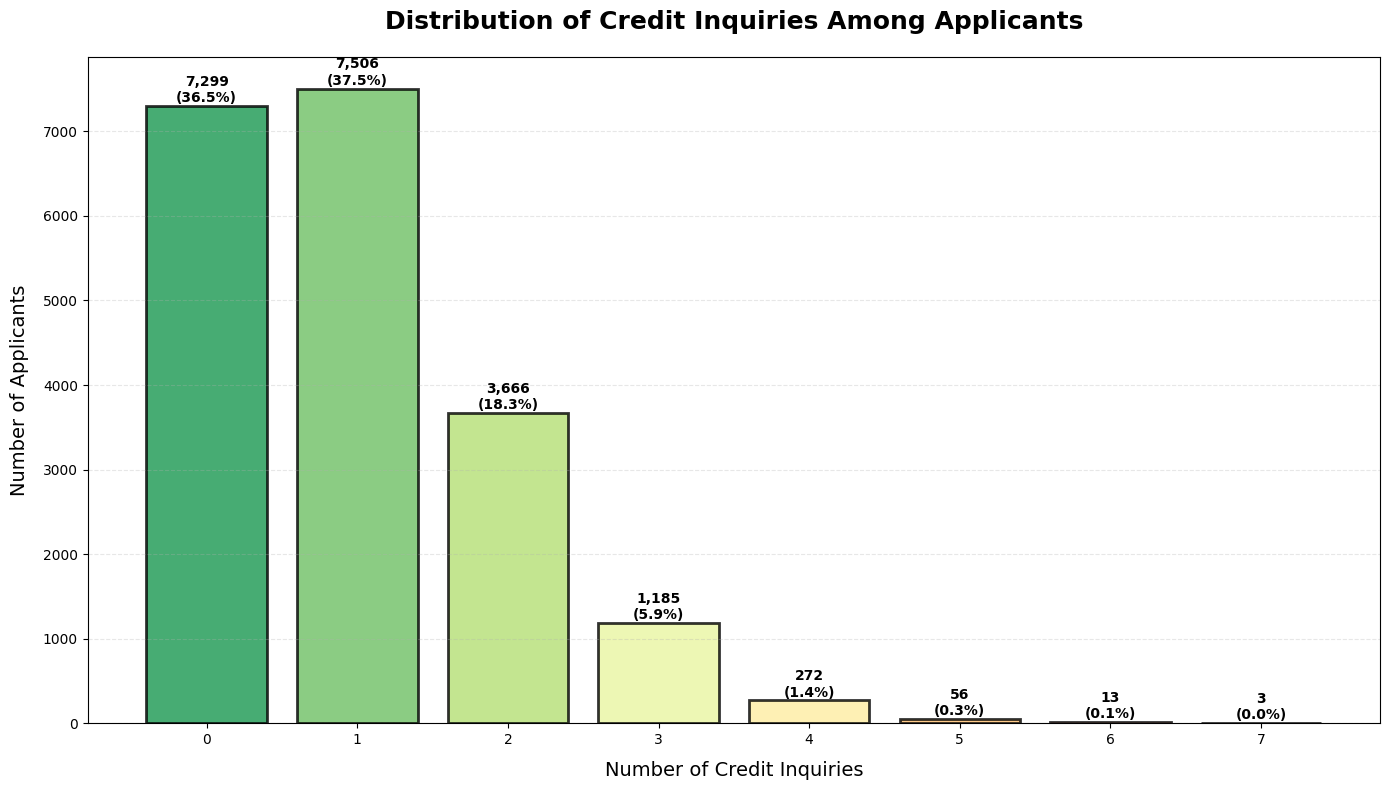

In [80]:
plt.figure(figsize=(14, 8))

inquiry_dist = df['NumberOfCreditInquiries'].value_counts().sort_index()
colors = plt.cm.RdYlGn(np.linspace(0.9, 0.1, len(inquiry_dist)))

bars = plt.bar(inquiry_dist.index, inquiry_dist.values, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.title('Distribution of Credit Inquiries Among Applicants', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Credit Inquiries', fontsize=14, labelpad=10)
plt.ylabel('Number of Applicants', fontsize=14, labelpad=10)

# Add count labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / len(df)) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height:,}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontweight='bold', fontsize=10, color='black')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [81]:
df = df.drop("NumberOfCreditInquiries", axis=1)

In [82]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange
0,39948,617,Employed,13152,48,Own,0.358336,0,Home,0,...,0.227590,419.805992,0.181077,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,Debt Consolidation,0,...,0.201077,794.054238,0.389852,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
2,40724,570,Employed,17627,36,Rent,0.244729,0,Education,0,...,0.212548,666.406688,0.462157,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,Home,0,...,0.300911,1047.506980,0.313098,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,Debt Consolidation,0,...,0.175990,330.179140,0.070210,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,Auto,0,...,0.195574,905.767712,0.627741,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800
19996,49246,567,Employed,25818,36,Rent,0.317372,0,Debt Consolidation,0,...,0.199168,958.395633,0.334418,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,Home,0,...,0.226766,945.427454,0.357227,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
19998,41025,560,Employed,14760,72,Own,0.534517,0,Debt Consolidation,0,...,0.264873,411.168284,0.408678,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"


## DebtToIncomeRatio           

In [83]:
df["DebtToIncomeRatio"]

0        0.358336
1        0.330274
2        0.244729
3        0.436244
4        0.078884
           ...   
19995    0.468077
19996    0.317372
19997    0.023014
19998    0.534517
19999    0.553434
Name: DebtToIncomeRatio, Length: 20000, dtype: float64

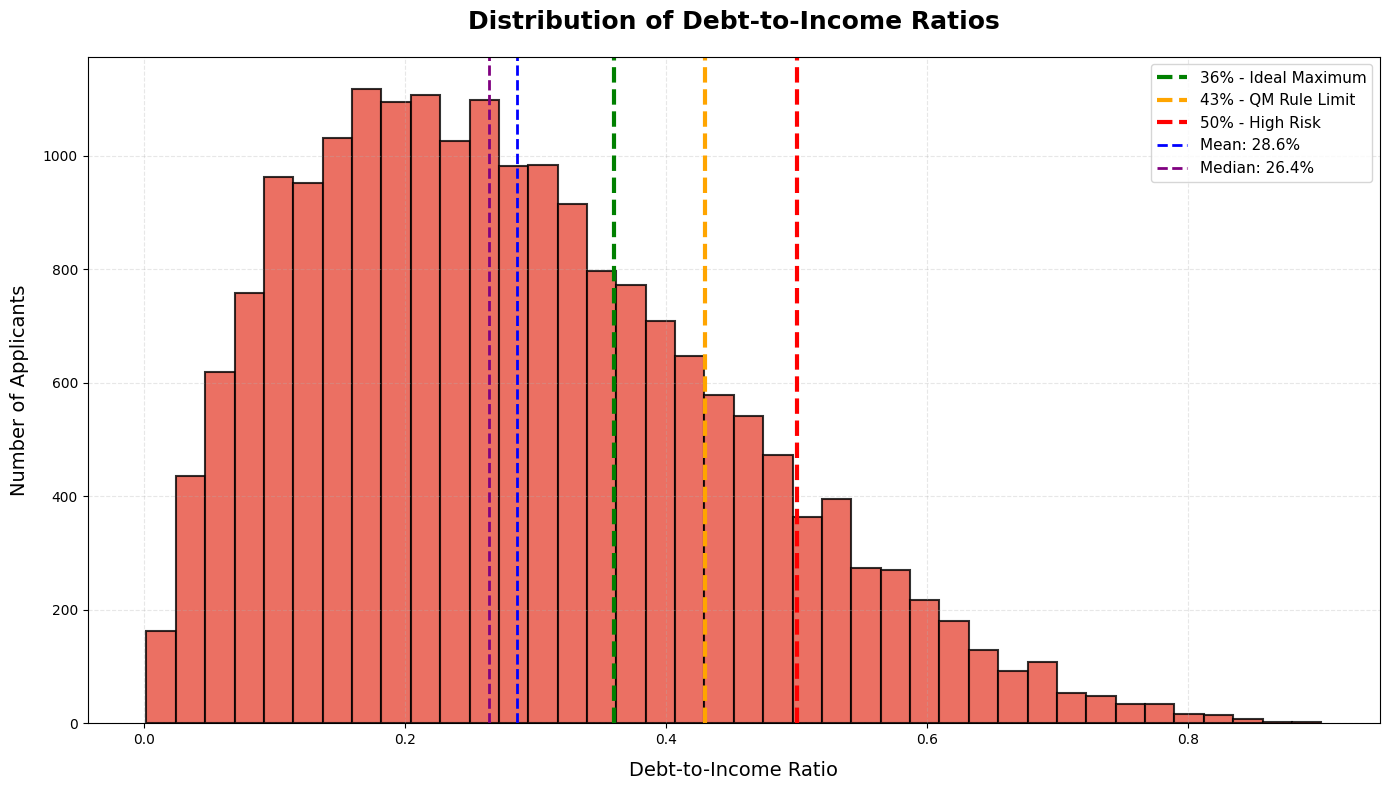

In [84]:
plt.figure(figsize=(14, 8))

# Histogram of DTI distribution
plt.hist(df['DebtToIncomeRatio'], bins=40, color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)

plt.title('Distribution of Debt-to-Income Ratios', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Debt-to-Income Ratio', fontsize=14, labelpad=10)
plt.ylabel('Number of Applicants', fontsize=14, labelpad=10)

# Add critical thresholds
plt.axvline(0.36, color='green', linestyle='--', linewidth=3, label='36% - Ideal Maximum')
plt.axvline(0.43, color='orange', linestyle='--', linewidth=3, label='43% - QM Rule Limit')
plt.axvline(0.50, color='red', linestyle='--', linewidth=3, label='50% - High Risk')

# Add statistics
mean_dti = df['DebtToIncomeRatio'].mean()
median_dti = df['DebtToIncomeRatio'].median()
plt.axvline(mean_dti, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_dti:.1%}')
plt.axvline(median_dti, color='purple', linestyle='--', linewidth=2, label=f'Median: {median_dti:.1%}')

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [85]:
# Calculate which ratio has stronger predictive power
from sklearn.metrics import roc_auc_score

# ROC AUC for both ratios
auc_dti = roc_auc_score(df['LoanApproved'], df['DebtToIncomeRatio'])
auc_total_dti = roc_auc_score(df['LoanApproved'], df['TotalDebtToIncomeRatio'])

print("PREDICTIVE POWER COMPARISON (ROC AUC):")
print(f"   DTI Ratio AUC:         {auc_dti:.3f}")
print(f"   Total DTI Ratio AUC:   {auc_total_dti:.3f}")
print(f"   Better Predictor:      {'DTI Ratio' if auc_dti > auc_total_dti else 'Total DTI Ratio'}")

# Interpretation
if abs(auc_dti - auc_total_dti) < 0.02:
    print("   Conclusion:           Both are similarly predictive")
elif auc_dti > auc_total_dti:
    print("   Conclusion:           DTI Ratio is slightly better")
else:
    print("   Conclusion:           Total DTI Ratio is slightly better")

PREDICTIVE POWER COMPARISON (ROC AUC):
   DTI Ratio AUC:         0.501
   Total DTI Ratio AUC:   0.094
   Better Predictor:      DTI Ratio
   Conclusion:           DTI Ratio is slightly better


## TotalDebtToIncomeRatio      

In [86]:
df["TotalDebtToIncomeRatio"]

0        0.181077
1        0.389852
2        0.462157
3        0.313098
4        0.070210
           ...   
19995    0.627741
19996    0.334418
19997    0.357227
19998    0.408678
19999    0.298006
Name: TotalDebtToIncomeRatio, Length: 20000, dtype: float64

In [87]:
df = df.drop("TotalDebtToIncomeRatio", axis=1)

In [88]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,...,BaseInterestRate,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange
0,39948,617,Employed,13152,48,Own,0.358336,0,Home,0,...,0.199652,0.227590,419.805992,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,Debt Consolidation,0,...,0.207045,0.201077,794.054238,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
2,40724,570,Employed,17627,36,Rent,0.244729,0,Education,0,...,0.217627,0.212548,666.406688,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,Home,0,...,0.300398,0.300911,1047.506980,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,Debt Consolidation,0,...,0.197184,0.175990,330.179140,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,Auto,0,...,0.216021,0.195574,905.767712,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800
19996,49246,567,Employed,25818,36,Rent,0.317372,0,Debt Consolidation,0,...,0.227318,0.199168,958.395633,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,Home,0,...,0.229533,0.226766,945.427454,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600
19998,41025,560,Employed,14760,72,Own,0.534517,0,Debt Consolidation,0,...,0.249760,0.264873,411.168284,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000"


## BankruptcyHistory           

In [89]:
df["BankruptcyHistory"]

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: BankruptcyHistory, Length: 20000, dtype: int64

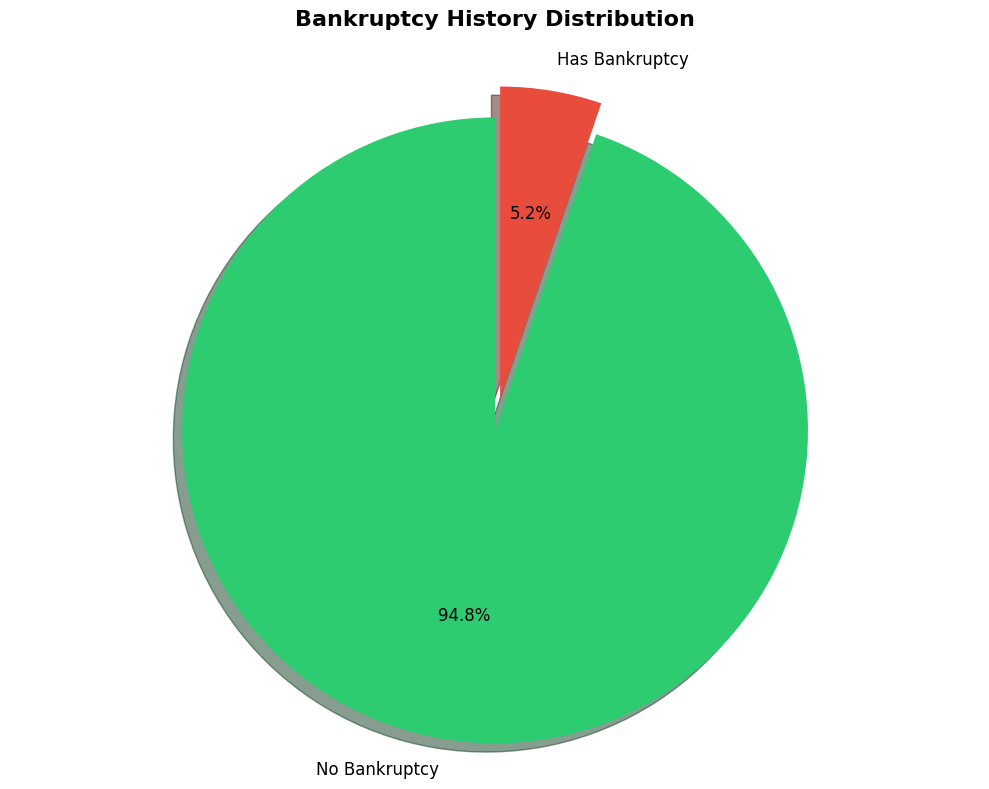

In [90]:
plt.figure(figsize=(10, 8))

# Convert to categorical for better visualization
df['BankruptcyHistory_Cat'] = df['BankruptcyHistory'].map({0: 'No Bankruptcy', 1: 'Has Bankruptcy'})
bankruptcy_counts = df['BankruptcyHistory_Cat'].value_counts()

colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)  # Explode the slices

plt.pie(bankruptcy_counts.values, labels=bankruptcy_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, startangle=90, shadow=True, textprops={'fontsize': 12})

plt.title('Bankruptcy History Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

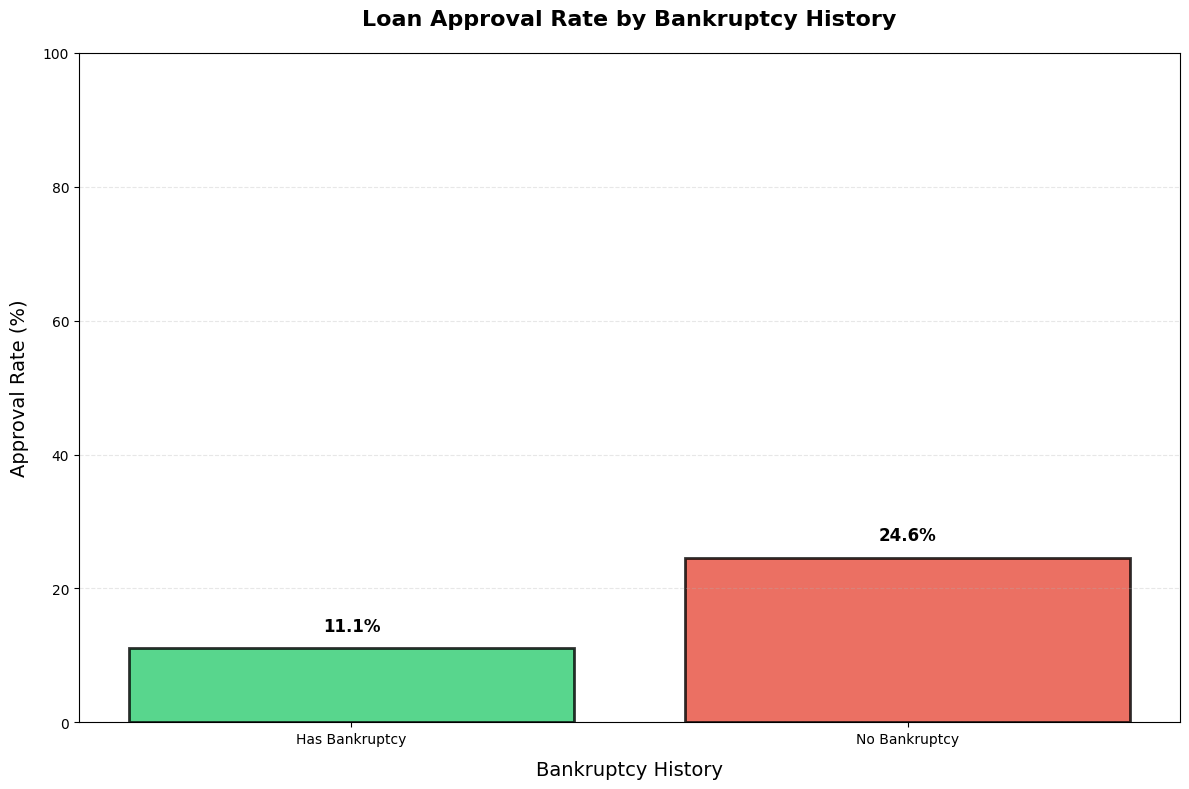

In [91]:
plt.figure(figsize=(12, 8))

# Calculate approval rates
approval_by_bankruptcy = df.groupby('BankruptcyHistory_Cat')['LoanApproved'].mean() * 100

colors = ['#2ecc71', '#e74c3c']
bars = plt.bar(approval_by_bankruptcy.index, approval_by_bankruptcy.values, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.title('Loan Approval Rate by Bankruptcy History', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Bankruptcy History', fontsize=14, labelpad=10)
plt.ylabel('Approval Rate (%)', fontsize=14, labelpad=10)
plt.ylim(0, 100)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=12, color='black')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [92]:
df = df.drop("BankruptcyHistory", axis=1)

In [93]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,LoanPurpose,PreviousLoanDefaults,PaymentHistory,...,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange,BankruptcyHistory_Cat
0,39948,617,Employed,13152,48,Own,0.358336,Home,0,29,...,0.227590,419.805992,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200,No Bankruptcy
1,39709,628,Employed,26045,48,Mortgage,0.330274,Debt Consolidation,0,21,...,0.201077,794.054238,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy
2,40724,570,Employed,17627,36,Rent,0.244729,Education,0,20,...,0.212548,666.406688,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy
3,69084,545,Employed,37898,96,Mortgage,0.436244,Home,0,27,...,0.300911,1047.506980,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800,No Bankruptcy
4,103264,594,Employed,9184,36,Mortgage,0.078884,Debt Consolidation,0,26,...,0.175990,330.179140,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400,No Bankruptcy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,Auto,0,21,...,0.195574,905.767712,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800,No Bankruptcy
19996,49246,567,Employed,25818,36,Rent,0.317372,Debt Consolidation,0,30,...,0.199168,958.395633,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600,No Bankruptcy
19997,48958,645,Employed,37033,72,Mortgage,0.023014,Home,0,28,...,0.226766,945.427454,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy
19998,41025,560,Employed,14760,72,Own,0.534517,Debt Consolidation,0,17,...,0.264873,411.168284,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy


## LoanPurpose

In [94]:
df["LoanPurpose"]

0                      Home
1        Debt Consolidation
2                 Education
3                      Home
4        Debt Consolidation
                ...        
19995                  Auto
19996    Debt Consolidation
19997                  Home
19998    Debt Consolidation
19999                 Other
Name: LoanPurpose, Length: 20000, dtype: object

In [95]:
df = df.drop("LoanPurpose", axis=1)

In [96]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,...,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange,BankruptcyHistory_Cat
0,39948,617,Employed,13152,48,Own,0.358336,0,29,9,...,0.227590,419.805992,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200,No Bankruptcy
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,21,9,...,0.201077,794.054238,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy
2,40724,570,Employed,17627,36,Rent,0.244729,0,20,22,...,0.212548,666.406688,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,27,10,...,0.300911,1047.506980,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800,No Bankruptcy
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,26,27,...,0.175990,330.179140,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400,No Bankruptcy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,21,7,...,0.195574,905.767712,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800,No Bankruptcy
19996,49246,567,Employed,25818,36,Rent,0.317372,0,30,28,...,0.199168,958.395633,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600,No Bankruptcy
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,28,8,...,0.226766,945.427454,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy
19998,41025,560,Employed,14760,72,Own,0.534517,0,17,13,...,0.264873,411.168284,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy


## PreviousLoanDefaults

In [97]:
age_distribution = df['PreviousLoanDefaults'].value_counts().reset_index()
age_distribution.columns = ['PreviousLoanDefaults', 'Count']
print(age_distribution)

   PreviousLoanDefaults  Count
0                     0  17999
1                     1   2001


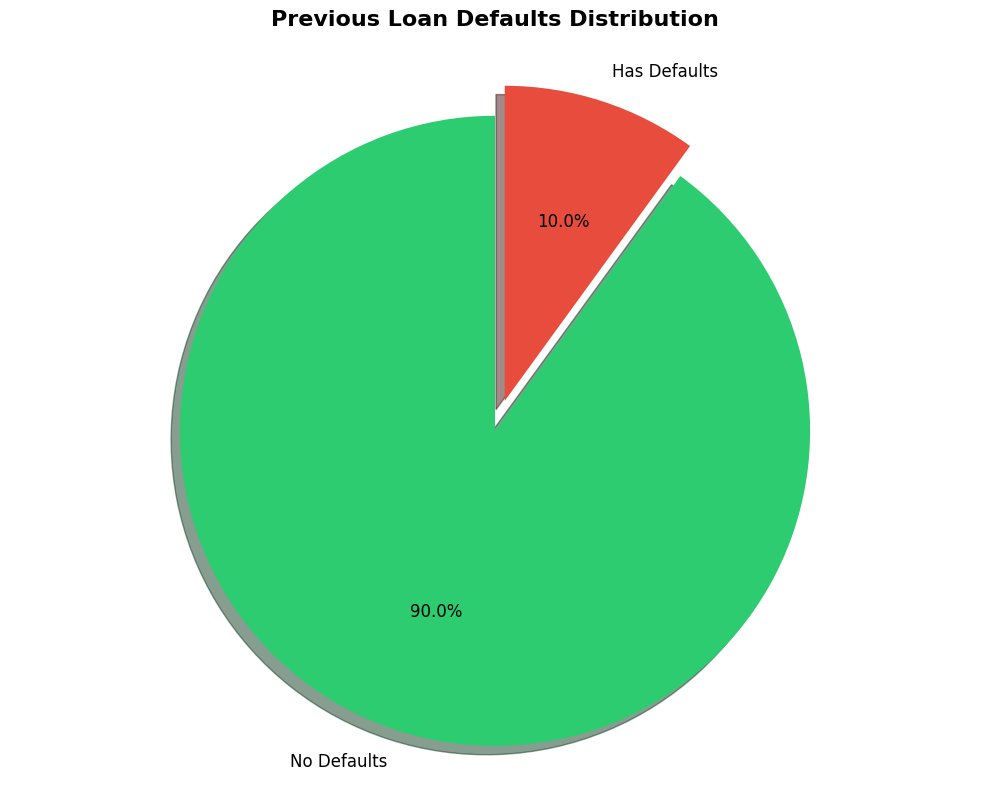

In [98]:
plt.figure(figsize=(10, 8))

# Convert to categorical for better visualization
df['PreviousDefaults_Cat'] = df['PreviousLoanDefaults'].map({0: 'No Defaults', 1: 'Has Defaults'})
defaults_counts = df['PreviousDefaults_Cat'].value_counts()

colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)

plt.pie(defaults_counts.values, labels=defaults_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, startangle=90, shadow=True, textprops={'fontsize': 12})

plt.title('Previous Loan Defaults Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

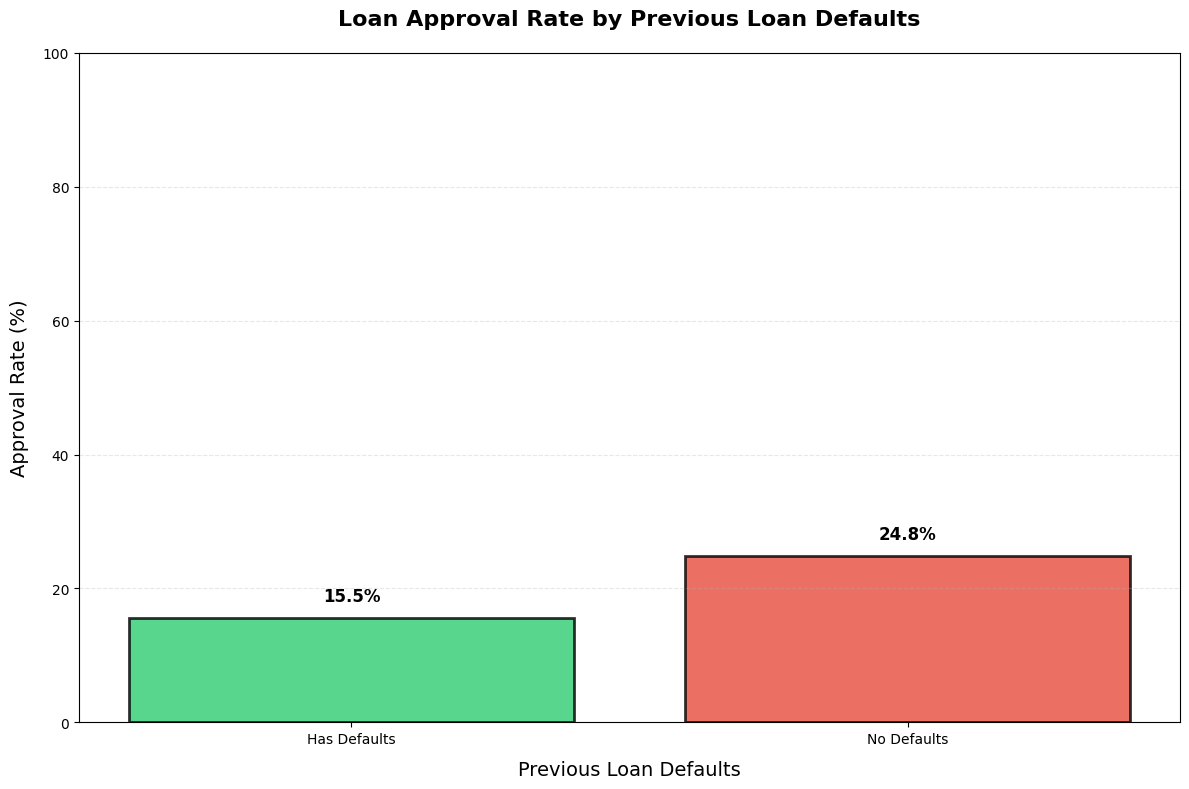

In [99]:
plt.figure(figsize=(12, 8))

# Calculate approval rates
approval_by_defaults = df.groupby('PreviousDefaults_Cat')['LoanApproved'].mean() * 100

colors = ['#2ecc71', '#e74c3c']
bars = plt.bar(approval_by_defaults.index, approval_by_defaults.values, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.title('Loan Approval Rate by Previous Loan Defaults', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Previous Loan Defaults', fontsize=14, labelpad=10)
plt.ylabel('Approval Rate (%)', fontsize=14, labelpad=10)
plt.ylim(0, 100)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=12, color='black')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

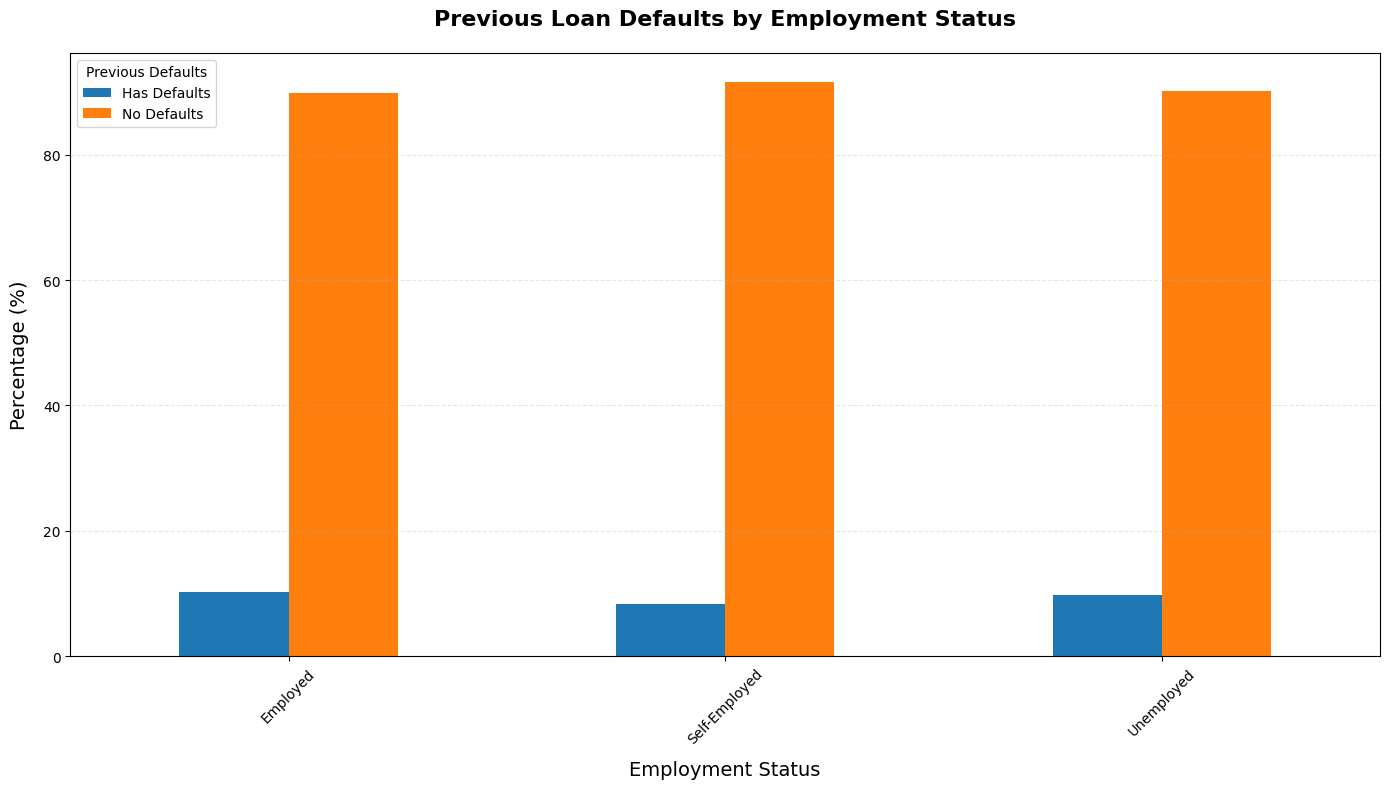

In [100]:
plt.figure(figsize=(14, 8))

defaults_by_employment = pd.crosstab(df['EmploymentStatus'], df['PreviousDefaults_Cat'], normalize='index') * 100

defaults_by_employment.plot(kind='bar', figsize=(14, 8))
plt.title('Previous Loan Defaults by Employment Status', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Employment Status', fontsize=14, labelpad=10)
plt.ylabel('Percentage (%)', fontsize=14, labelpad=10)
plt.legend(title='Previous Defaults')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PaymentHistory              

In [101]:
df["PaymentHistory"]

0        29
1        21
2        20
3        27
4        26
         ..
19995    21
19996    30
19997    28
19998    17
19999    36
Name: PaymentHistory, Length: 20000, dtype: int64

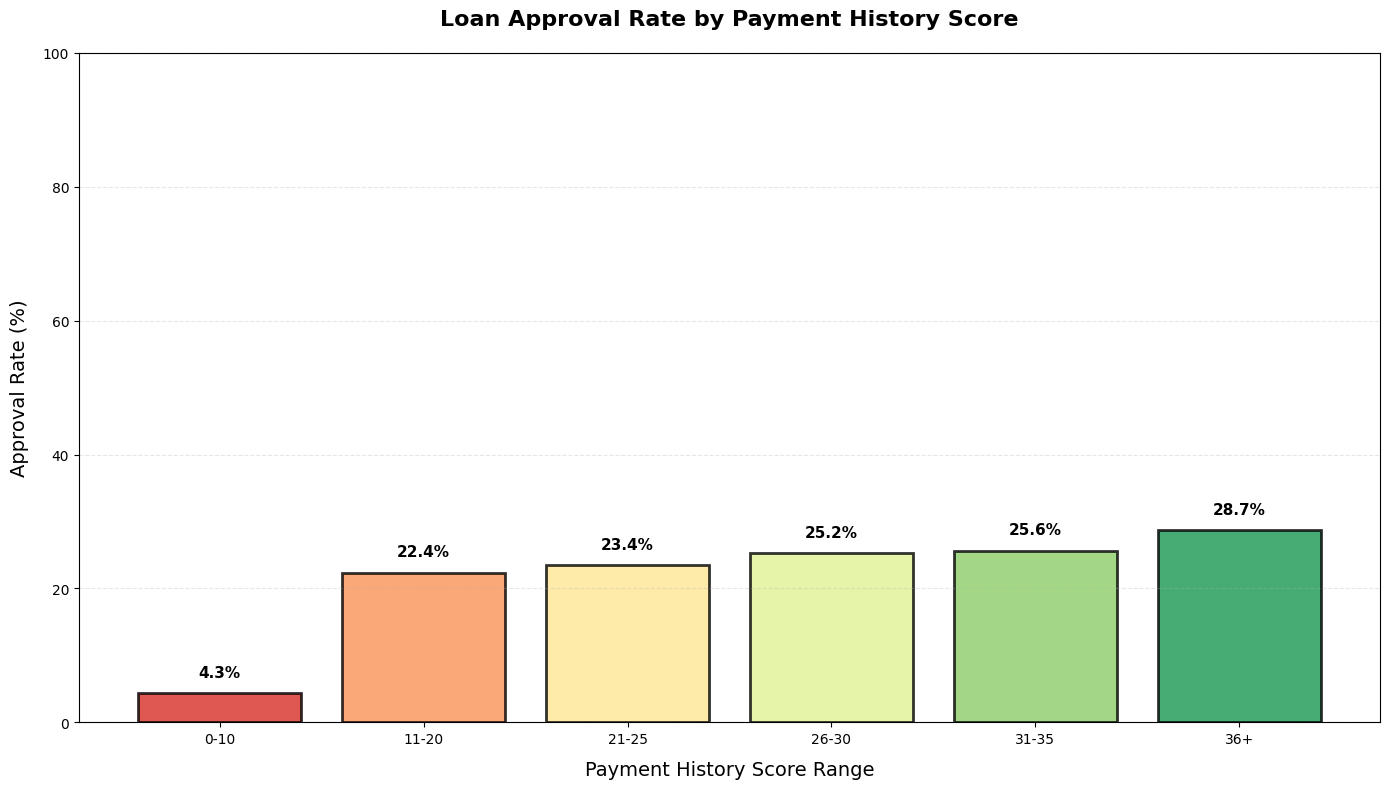

In [102]:
plt.figure(figsize=(14, 8))

# Create payment history ranges
payment_bins = [0, 10, 20, 25, 30, 35, df['PaymentHistory'].max()]
payment_labels = ['0-10', '11-20', '21-25', '26-30', '31-35', '36+']
df['PaymentRange'] = pd.cut(df['PaymentHistory'], bins=payment_bins, labels=payment_labels)

approval_by_payment = df.groupby('PaymentRange')['LoanApproved'].mean() * 100

colors = plt.cm.RdYlGn(np.linspace(0.1, 0.9, len(approval_by_payment)))
bars = plt.bar(approval_by_payment.index, approval_by_payment.values, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.title('Loan Approval Rate by Payment History Score', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Payment History Score Range', fontsize=14, labelpad=10)
plt.ylabel('Approval Rate (%)', fontsize=14, labelpad=10)
plt.ylim(0, 100)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11, color='black')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## SavingsAccountBalance       

In [103]:
df["SavingsAccountBalance"]

0        7632
1        4627
2         886
3        1675
4        1555
         ... 
19995     235
19996    6910
19997    2175
19998    3037
19999    2682
Name: SavingsAccountBalance, Length: 20000, dtype: int64

In [104]:
df = df.drop("SavingsAccountBalance", axis=1)

In [105]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,...,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange,BankruptcyHistory_Cat,PreviousDefaults_Cat,PaymentRange
0,39948,617,Employed,13152,48,Own,0.358336,0,29,9,...,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200,No Bankruptcy,No Defaults,26-30
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,21,9,...,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,21-25
2,40724,570,Employed,17627,36,Rent,0.244729,0,20,22,...,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,27,10,...,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800,No Bankruptcy,No Defaults,26-30
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,26,27,...,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400,No Bankruptcy,No Defaults,26-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,21,7,...,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800,No Bankruptcy,No Defaults,21-25
19996,49246,567,Employed,25818,36,Rent,0.317372,0,30,28,...,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600,No Bankruptcy,No Defaults,26-30
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,28,8,...,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,26-30
19998,41025,560,Employed,14760,72,Own,0.534517,0,17,13,...,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20


## CheckingAccountBalance      

In [106]:
df["CheckingAccountBalance"]

0        1202
1        3460
2         895
3        1217
4        4981
         ... 
19995    3429
19996     183
19997     746
19998     260
19999    1766
Name: CheckingAccountBalance, Length: 20000, dtype: int64

In [107]:
df = df.drop("CheckingAccountBalance", axis=1)

In [108]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,...,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange,BankruptcyHistory_Cat,PreviousDefaults_Cat,PaymentRange
0,39948,617,Employed,13152,48,Own,0.358336,0,29,9,...,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200,No Bankruptcy,No Defaults,26-30
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,21,9,...,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,21-25
2,40724,570,Employed,17627,36,Rent,0.244729,0,20,22,...,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,27,10,...,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800,No Bankruptcy,No Defaults,26-30
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,26,27,...,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400,No Bankruptcy,No Defaults,26-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,21,7,...,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800,No Bankruptcy,No Defaults,21-25
19996,49246,567,Employed,25818,36,Rent,0.317372,0,30,28,...,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600,No Bankruptcy,No Defaults,26-30
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,28,8,...,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,26-30
19998,41025,560,Employed,14760,72,Own,0.534517,0,17,13,...,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20


## TotalAssets                 

In [109]:
df["TotalAssets"]

0        146111
1         53204
2         25176
3        104822
4        244305
          ...  
19995     80969
19996     69571
19997    108316
19998     22085
19999     83008
Name: TotalAssets, Length: 20000, dtype: int64

In [110]:
df = df.drop("TotalAssets", axis=1)

In [111]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,...,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange,BankruptcyHistory_Cat,PreviousDefaults_Cat,PaymentRange
0,39948,617,Employed,13152,48,Own,0.358336,0,29,9,...,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200,No Bankruptcy,No Defaults,26-30
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,21,9,...,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,21-25
2,40724,570,Employed,17627,36,Rent,0.244729,0,20,22,...,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,27,10,...,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800,No Bankruptcy,No Defaults,26-30
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,26,27,...,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400,No Bankruptcy,No Defaults,26-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,21,7,...,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800,No Bankruptcy,No Defaults,21-25
19996,49246,567,Employed,25818,36,Rent,0.317372,0,30,28,...,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600,No Bankruptcy,No Defaults,26-30
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,28,8,...,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,26-30
19998,41025,560,Employed,14760,72,Own,0.534517,0,17,13,...,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20


## TotalLiabilities            

In [112]:
df["TotalLiabilities"]

0         19183
1          9595
2        128874
3          5370
4         17286
          ...  
19995     25642
19996      5569
19997      4653
19998     11485
19999     41636
Name: TotalLiabilities, Length: 20000, dtype: int64

In [113]:
df = df.drop("TotalLiabilities", axis=1)

In [114]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,...,LoanApproved,RiskScore,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange,BankruptcyHistory_Cat,PreviousDefaults_Cat,PaymentRange
0,39948,617,Employed,13152,48,Own,0.358336,0,29,9,...,0,49.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200,No Bankruptcy,No Defaults,26-30
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,21,9,...,0,52.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,21-25
2,40724,570,Employed,17627,36,Rent,0.244729,0,20,22,...,0,52.0,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,27,10,...,0,54.0,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800,No Bankruptcy,No Defaults,26-30
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,26,27,...,1,36.0,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400,No Bankruptcy,No Defaults,26-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,21,7,...,0,55.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800,No Bankruptcy,No Defaults,21-25
19996,49246,567,Employed,25818,36,Rent,0.317372,0,30,28,...,0,54.0,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600,No Bankruptcy,No Defaults,26-30
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,28,8,...,0,45.0,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,26-30
19998,41025,560,Employed,14760,72,Own,0.534517,0,17,13,...,0,59.0,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20


## MonthlyIncome               

In [115]:
df["MonthlyIncome"]

0        3329.000000
1        3309.083333
2        3393.666667
3        5757.000000
4        8605.333333
            ...     
19995    2515.000000
19996    4103.833333
19997    4079.833333
19998    3418.750000
19999    4435.583333
Name: MonthlyIncome, Length: 20000, dtype: float64

In [116]:
df["MonthlyIncome"].describe()

count    20000.000000
mean      4891.715521
std       3296.771598
min       1250.000000
25%       2629.583333
50%       4034.750000
75%       6163.000000
max      25000.000000
Name: MonthlyIncome, dtype: float64

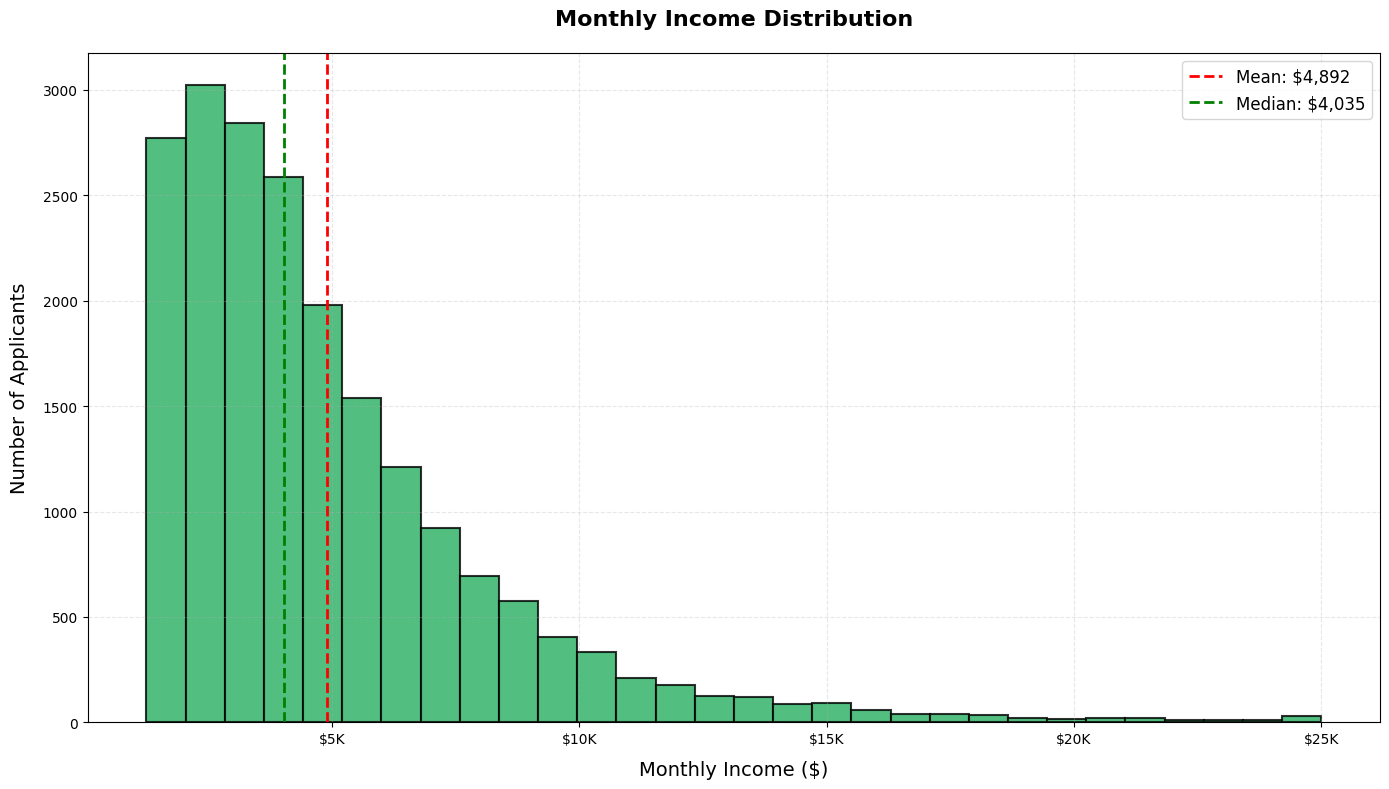

In [117]:
plt.figure(figsize=(14, 8))

plt.hist(df['MonthlyIncome'], bins=30, color='#27ae60', alpha=0.8, edgecolor='black', linewidth=1.5)

plt.title('Monthly Income Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Monthly Income ($)', fontsize=14, labelpad=10)
plt.ylabel('Number of Applicants', fontsize=14, labelpad=10)

# Add statistics lines
mean_income = df['MonthlyIncome'].mean()
median_income = df['MonthlyIncome'].median()
plt.axvline(mean_income, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_income:,.0f}')
plt.axvline(median_income, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_income:,.0f}')

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()

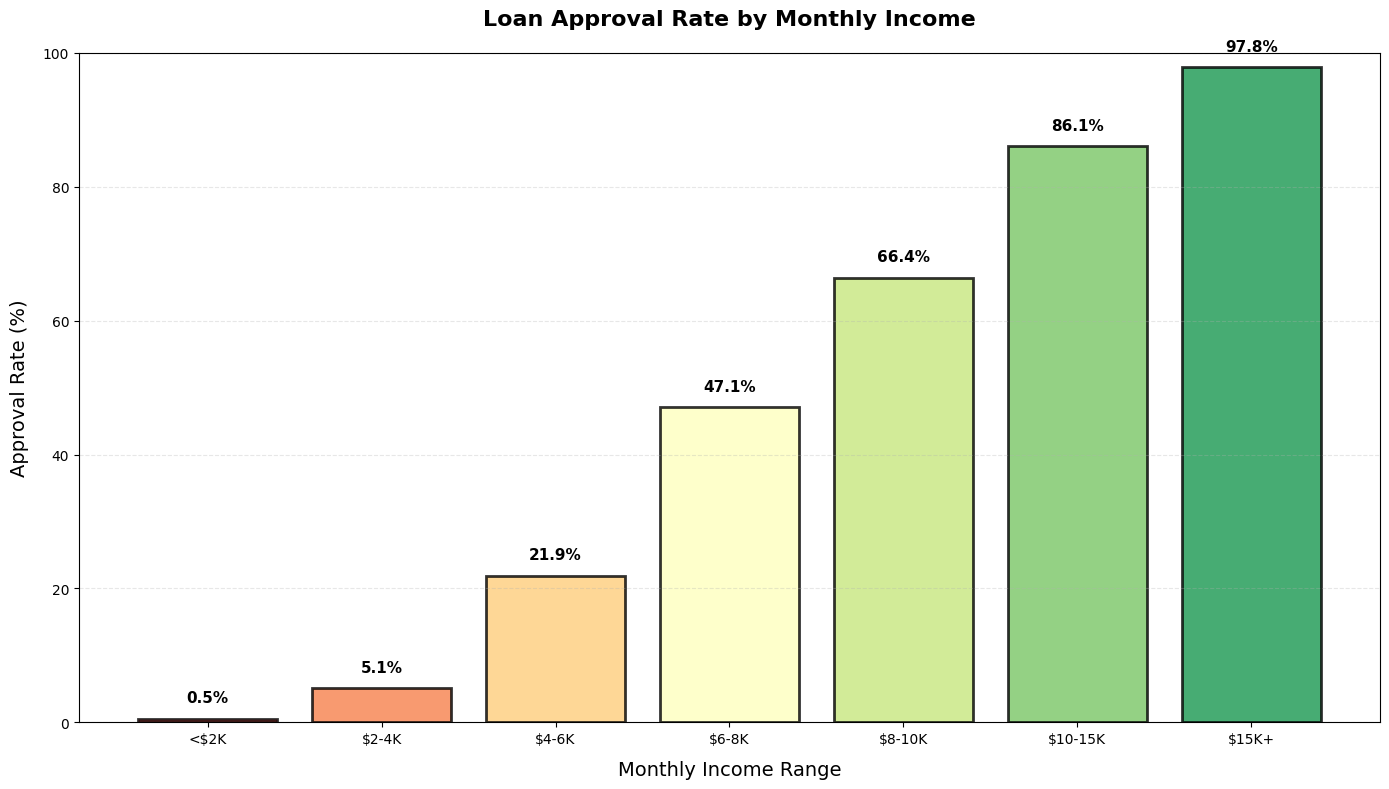

In [118]:
plt.figure(figsize=(14, 8))

# Create income ranges
income_bins = [0, 2000, 4000, 6000, 8000, 10000, 15000, df['MonthlyIncome'].max()]
income_labels = ['<$2K', '$2-4K', '$4-6K', '$6-8K', '$8-10K', '$10-15K', '$15K+']
df['IncomeRange'] = pd.cut(df['MonthlyIncome'], bins=income_bins, labels=income_labels)

approval_by_income = df.groupby('IncomeRange')['LoanApproved'].mean() * 100

colors = plt.cm.RdYlGn(np.linspace(0.1, 0.9, len(approval_by_income)))
bars = plt.bar(approval_by_income.index, approval_by_income.values, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=2)

plt.title('Loan Approval Rate by Monthly Income', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Monthly Income Range', fontsize=14, labelpad=10)
plt.ylabel('Approval Rate (%)', fontsize=14, labelpad=10)
plt.ylim(0, 100)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11, color='black')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

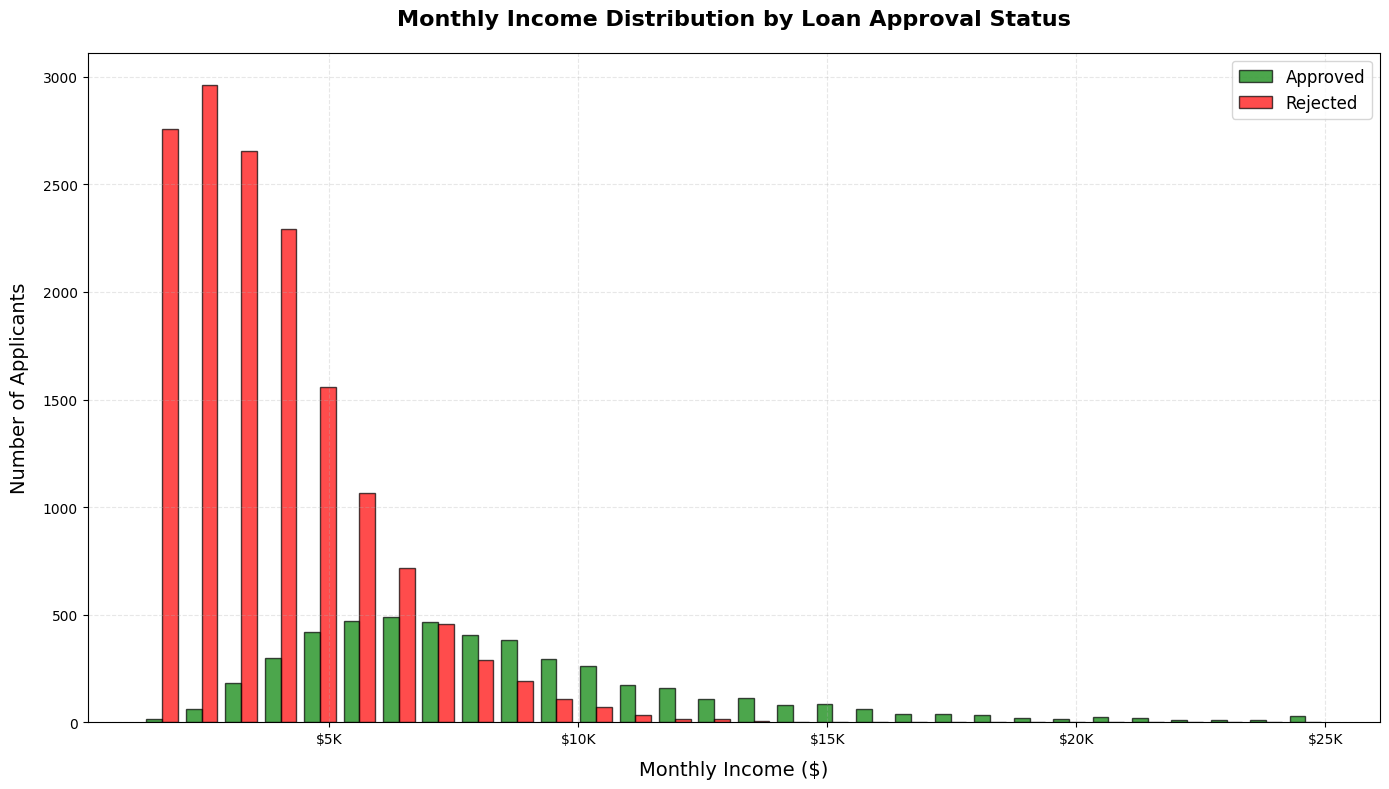

In [119]:
plt.figure(figsize=(14, 8))

# Create histogram for approved vs rejected
approved_income = df[df['LoanApproved'] == 1]['MonthlyIncome']
rejected_income = df[df['LoanApproved'] == 0]['MonthlyIncome']

plt.hist([approved_income, rejected_income], bins=30, 
         label=['Approved', 'Rejected'], alpha=0.7, 
         color=['green', 'red'], edgecolor='black')

plt.title('Monthly Income Distribution by Loan Approval Status', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Monthly Income ($)', fontsize=14, labelpad=10)
plt.ylabel('Number of Applicants', fontsize=14, labelpad=10)

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()

## UtilityBillsPaymentHistory 

In [120]:
df["UtilityBillsPaymentHistory"]

0        0.724972
1        0.935132
2        0.872241
3        0.896155
4        0.941369
           ...   
19995    0.826217
19996    0.816618
19997    0.887216
19998    0.843787
19999    0.853801
Name: UtilityBillsPaymentHistory, Length: 20000, dtype: float64

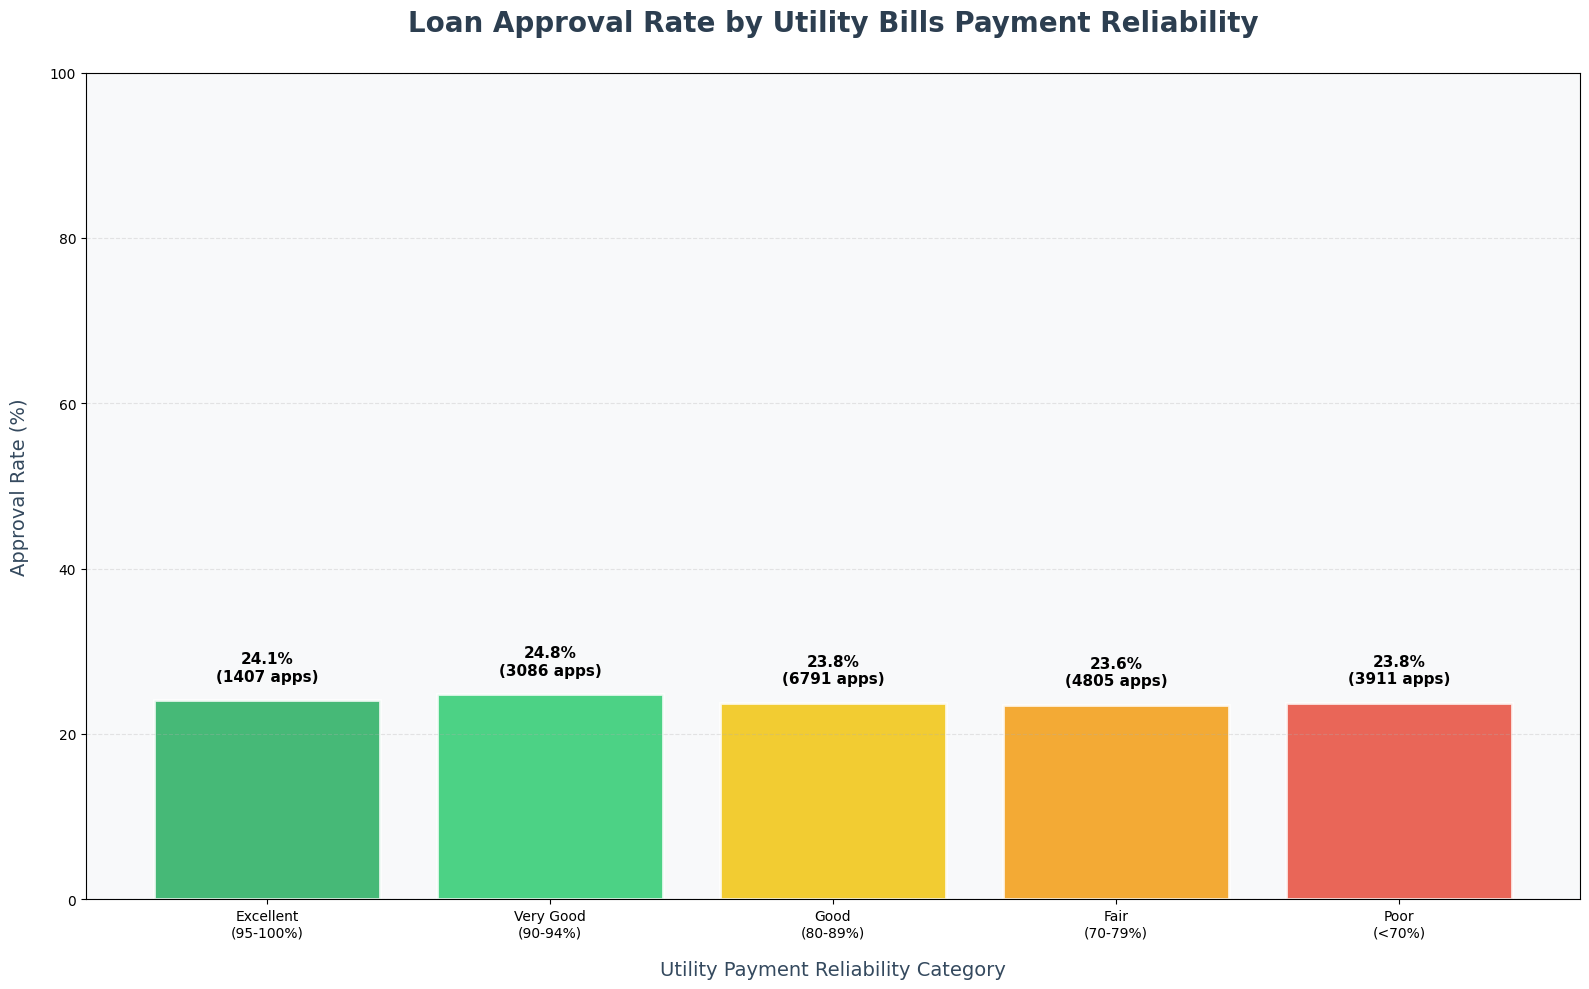

In [121]:
plt.figure(figsize=(16, 10))

# Create meaningful categories with clear labels
def utility_category(score):
    if score >= 0.95: return 'Excellent\n(95-100%)'
    elif score >= 0.90: return 'Very Good\n(90-94%)'
    elif score >= 0.80: return 'Good\n(80-89%)'
    elif score >= 0.70: return 'Fair\n(70-79%)'
    else: return 'Poor\n(<70%)'

df['UtilityCategory'] = df['UtilityBillsPaymentHistory'].apply(utility_category)

# Calculate approval rates and counts
approval_by_utility = df.groupby('UtilityCategory')['LoanApproved'].mean() * 100
counts_by_utility = df.groupby('UtilityCategory').size()

# Order categories logically
category_order = ['Excellent\n(95-100%)', 'Very Good\n(90-94%)', 'Good\n(80-89%)', 'Fair\n(70-79%)', 'Poor\n(<70%)']
approval_by_utility = approval_by_utility.reindex(category_order)
counts_by_utility = counts_by_utility.reindex(category_order)

colors = ['#27ae60', '#2ecc71', '#f1c40f', '#f39c12', '#e74c3c']
bars = plt.bar(approval_by_utility.index, approval_by_utility.values, 
              color=colors, alpha=0.85, edgecolor='white', linewidth=2)

plt.title('Loan Approval Rate by Utility Bills Payment Reliability', 
          fontsize=20, fontweight='bold', pad=30, color='#2c3e50')
plt.xlabel('Utility Payment Reliability Category', fontsize=14, labelpad=15, color='#34495e')
plt.ylabel('Approval Rate (%)', fontsize=14, labelpad=15, color='#34495e')
plt.ylim(0, 100)

# Add approval percentage labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = counts_by_utility.iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%\n({count} apps)', ha='center', va='bottom', 
             fontweight='bold', fontsize=11, color='black')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()

## JobTenure                   

In [122]:
df["JobTenure"]

0        11
1         3
2         6
3         5
4         5
         ..
19995     1
19996     3
19997     3
19998     5
19999     5
Name: JobTenure, Length: 20000, dtype: int64

In [123]:
df["JobTenure"].describe()

count    20000.000000
mean         5.002650
std          2.236804
min          0.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         16.000000
Name: JobTenure, dtype: float64

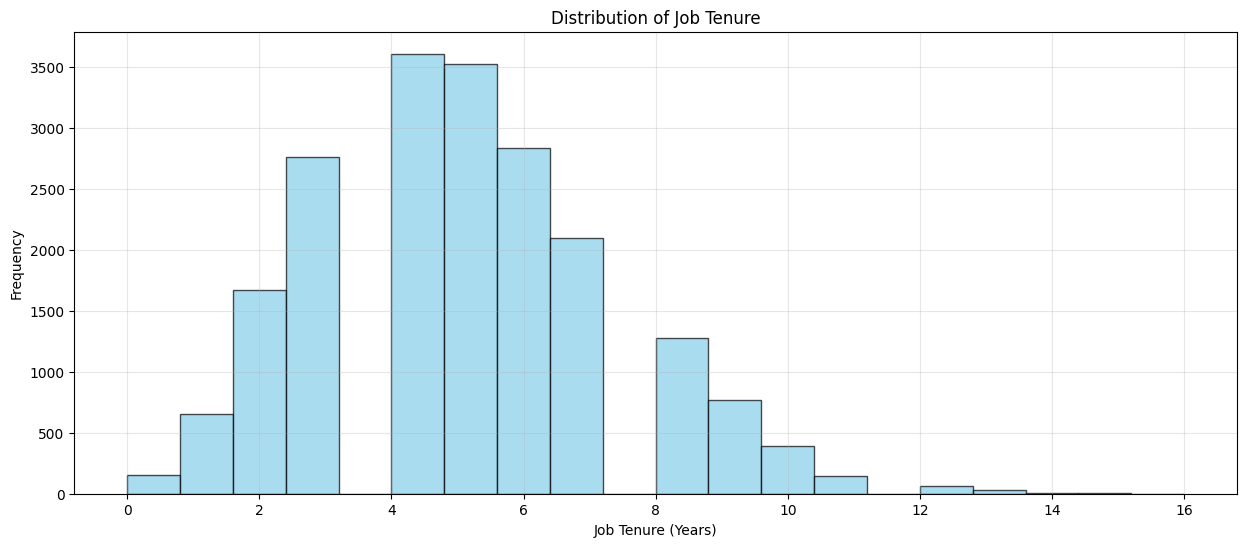

In [124]:
# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Create the visualization
fig, (ax1) = plt.subplots(1, figsize=(15, 6))

# Histogram with KDE
ax1.hist(df['JobTenure'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Job Tenure (Years)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Job Tenure')
ax1.grid(True, alpha=0.3)

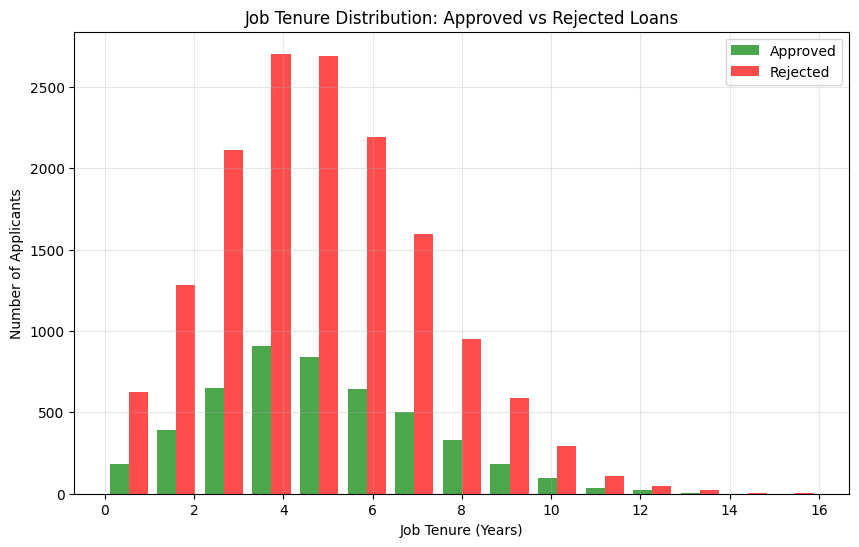

In [125]:
plt.figure(figsize=(10, 6))

approved = df[df['LoanApproved'] == 1]['JobTenure']
rejected = df[df['LoanApproved'] == 0]['JobTenure']

plt.hist([approved, rejected], bins=15, alpha=0.7, label=['Approved', 'Rejected'], color=['green', 'red'])

plt.xlabel('Job Tenure (Years)')
plt.ylabel('Number of Applicants')
plt.title('Job Tenure Distribution: Approved vs Rejected Loans')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## NetWorth                    

In [126]:
df["NetWorth"]

0        126928
1         43609
2          5205
3         99452
4        227019
          ...  
19995     55327
19996     64002
19997    103663
19998     10600
19999     41372
Name: NetWorth, Length: 20000, dtype: int64

In [127]:
df = df.drop("NetWorth", axis=1)

In [128]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,...,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange,BankruptcyHistory_Cat,PreviousDefaults_Cat,PaymentRange,IncomeRange,UtilityCategory
0,39948,617,Employed,13152,48,Own,0.358336,0,29,9,...,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200,No Bankruptcy,No Defaults,26-30,$2-4K,Fair\n(70-79%)
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,21,9,...,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,21-25,$2-4K,Very Good\n(90-94%)
2,40724,570,Employed,17627,36,Rent,0.244729,0,20,22,...,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20,$2-4K,Good\n(80-89%)
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,27,10,...,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800,No Bankruptcy,No Defaults,26-30,$4-6K,Good\n(80-89%)
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,26,27,...,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400,No Bankruptcy,No Defaults,26-30,$8-10K,Very Good\n(90-94%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,21,7,...,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800,No Bankruptcy,No Defaults,21-25,$2-4K,Good\n(80-89%)
19996,49246,567,Employed,25818,36,Rent,0.317372,0,30,28,...,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600,No Bankruptcy,No Defaults,26-30,$4-6K,Good\n(80-89%)
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,28,8,...,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,26-30,$4-6K,Good\n(80-89%)
19998,41025,560,Employed,14760,72,Own,0.534517,0,17,13,...,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20,$2-4K,Good\n(80-89%)


## BaseInterestRate            

In [129]:
df["BaseInterestRate"]

0        0.199652
1        0.207045
2        0.217627
3        0.300398
4        0.197184
           ...   
19995    0.216021
19996    0.227318
19997    0.229533
19998    0.249760
19999    0.240055
Name: BaseInterestRate, Length: 20000, dtype: float64

In [130]:
df = df.drop("BaseInterestRate", axis=1)

In [131]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,...,AgeGroup,Income_Category,CreditGroup,CreditCategory,DebtRange,BankruptcyHistory_Cat,PreviousDefaults_Cat,PaymentRange,IncomeRange,UtilityCategory
0,39948,617,Employed,13152,48,Own,0.358336,0,29,9,...,36-45,< 50k,Fair\n(580-669),Fair (580-669),<$200,No Bankruptcy,No Defaults,26-30,$2-4K,Fair\n(70-79%)
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,21,9,...,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,21-25,$2-4K,Very Good\n(90-94%)
2,40724,570,Employed,17627,36,Rent,0.244729,0,20,22,...,46-55,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20,$2-4K,Good\n(80-89%)
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,27,10,...,56-65,50k - 100k,Poor\n(300-579),Poor (<580),$600-800,No Bankruptcy,No Defaults,26-30,$4-6K,Good\n(80-89%)
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,26,27,...,36-45,100k - 150k,Fair\n(580-669),Fair (580-669),$200-400,No Bankruptcy,No Defaults,26-30,$8-10K,Very Good\n(90-94%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,21,7,...,36-45,< 50k,Fair\n(580-669),Fair (580-669),$600-800,No Bankruptcy,No Defaults,21-25,$2-4K,Good\n(80-89%)
19996,49246,567,Employed,25818,36,Rent,0.317372,0,30,28,...,56-65,< 50k,Poor\n(300-579),Poor (<580),$400-600,No Bankruptcy,No Defaults,26-30,$4-6K,Good\n(80-89%)
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,28,8,...,36-45,< 50k,Fair\n(580-669),Fair (580-669),$400-600,No Bankruptcy,No Defaults,26-30,$4-6K,Good\n(80-89%)
19998,41025,560,Employed,14760,72,Own,0.534517,0,17,13,...,56-65,< 50k,Poor\n(300-579),Poor (<580),"$800-1,000",No Bankruptcy,No Defaults,11-20,$2-4K,Good\n(80-89%)


## InterestRate                

In [132]:
df["InterestRate"]*100

0        22.758963
1        20.107712
2        21.254801
3        30.091085
4        17.599018
           ...    
19995    19.557396
19996    19.916829
19997    22.676636
19998    26.487268
19999    24.269330
Name: InterestRate, Length: 20000, dtype: float64

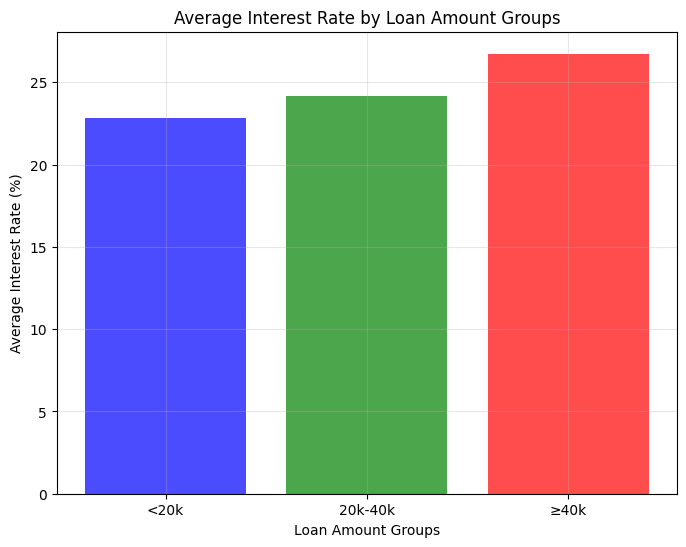

In [133]:
loan_groups = ['<20k', '20k-40k', '≥40k']
interest_means = [
    df[df['LoanAmount'] < 20000]['InterestRate'].mean() * 100,
    df[(df['LoanAmount'] >= 20000) & (df['LoanAmount'] < 40000)]['InterestRate'].mean() * 100,
    df[df['LoanAmount'] >= 40000]['InterestRate'].mean() * 100
]

plt.figure(figsize=(8, 6))
plt.bar(loan_groups, interest_means, color=['blue', 'green', 'red'], alpha=0.7)
plt.ylabel('Average Interest Rate (%)')
plt.xlabel('Loan Amount Groups')
plt.title('Average Interest Rate by Loan Amount Groups')
plt.grid(True, alpha=0.3)
plt.show()

## MonthlyLoanPayment          

In [134]:
df["MonthlyLoanPayment"]

0         419.805992
1         794.054238
2         666.406688
3        1047.506980
4         330.179140
            ...     
19995     905.767712
19996     958.395633
19997     945.427454
19998     411.168284
19999    1049.830407
Name: MonthlyLoanPayment, Length: 20000, dtype: float64

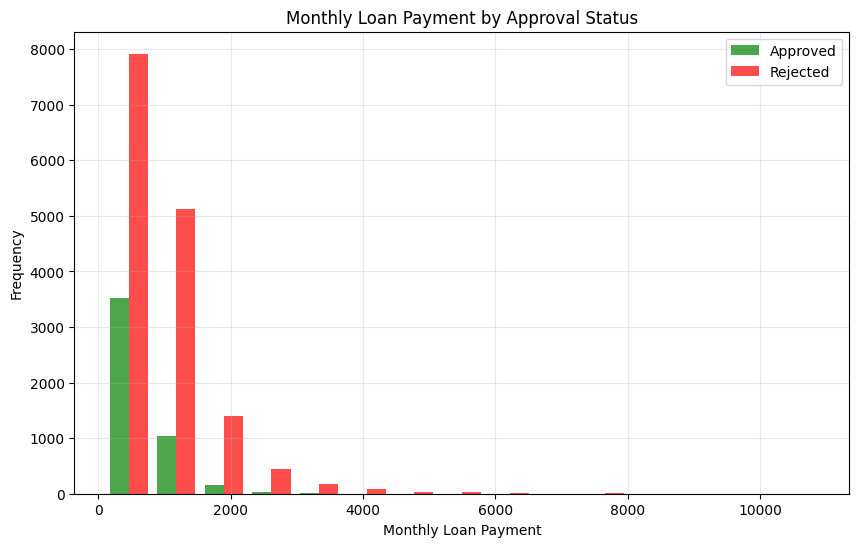

In [135]:
# Graph: By Loan Approval
plt.figure(figsize=(10, 6))
approved = df[df['LoanApproved'] == 1]['MonthlyLoanPayment']
rejected = df[df['LoanApproved'] == 0]['MonthlyLoanPayment']
plt.hist([approved, rejected], bins=15, alpha=0.7, label=['Approved', 'Rejected'], color=['green', 'red'])
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Frequency')
plt.title('Monthly Loan Payment by Approval Status')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## LoanApproved                

In [136]:
df["LoanApproved"]

0        0
1        0
2        0
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: LoanApproved, Length: 20000, dtype: int64

In [137]:
age_distribution = df['LoanApproved'].value_counts().reset_index()
age_distribution.columns = ['LoanApproved', 'Count']
print(age_distribution)

   LoanApproved  Count
0             0  15220
1             1   4780


## RiskScore                   

In [138]:
df["RiskScore"]

0        49.0
1        52.0
2        52.0
3        54.0
4        36.0
         ... 
19995    55.0
19996    54.0
19997    45.0
19998    59.0
19999    59.0
Name: RiskScore, Length: 20000, dtype: float64

In [139]:
df["RiskScore"].describe()

count    20000.000000
mean        50.766780
std          7.778262
min         28.800000
25%         46.000000
50%         52.000000
75%         56.000000
max         84.000000
Name: RiskScore, dtype: float64

In [140]:
age_distribution = df['RiskScore'].value_counts().reset_index()
age_distribution.columns = ['RiskScore', 'Count']
print(age_distribution)

    RiskScore  Count
0        52.0   1267
1        51.0   1254
2        53.0   1248
3        54.0   1224
4        55.0   1155
..        ...    ...
68       54.4      2
69       39.0      2
70       78.0      2
71       84.0      1
72       38.0      1

[73 rows x 2 columns]


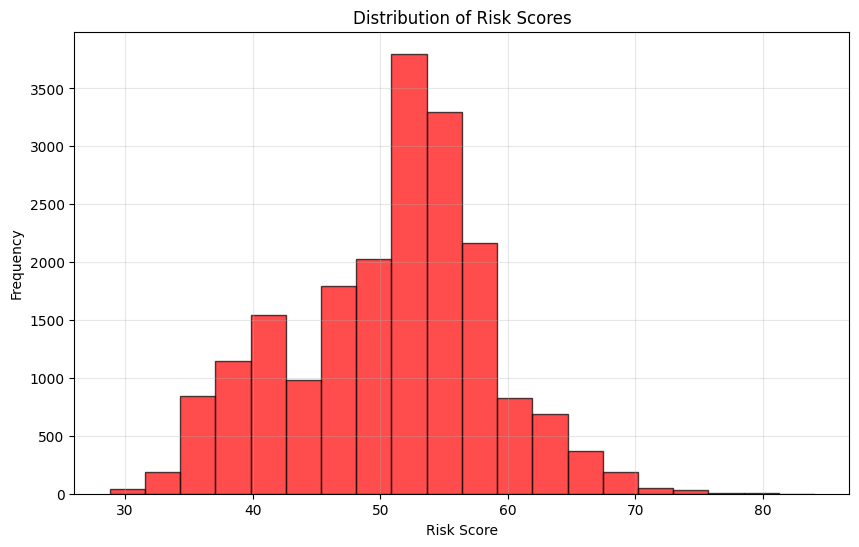

In [141]:
plt.figure(figsize=(10, 6))
plt.hist(df["RiskScore"], bins=20, color='red', alpha=0.7, edgecolor='black')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True, alpha=0.3)
plt.show()

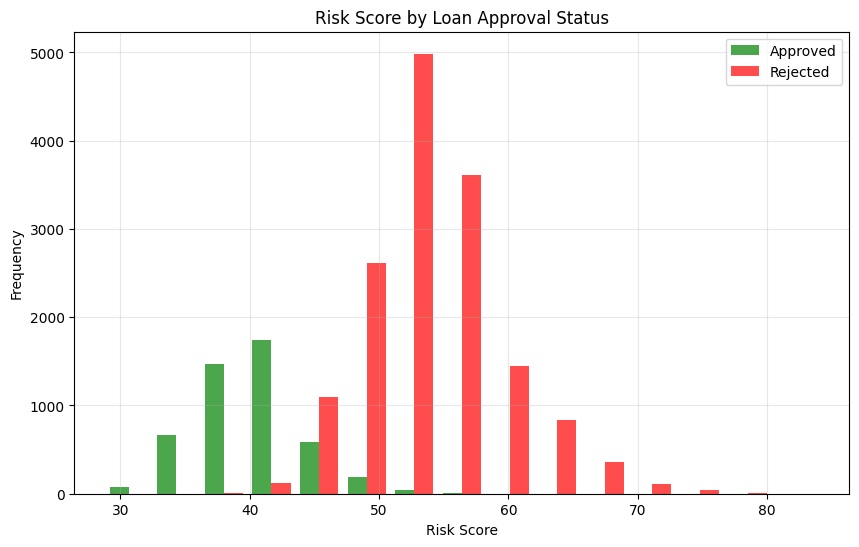

In [142]:
plt.figure(figsize=(10, 6))
approved = df[df['LoanApproved'] == 1]['RiskScore']
rejected = df[df['LoanApproved'] == 0]['RiskScore']
plt.hist([approved, rejected], bins=15, alpha=0.7, label=['Approved', 'Rejected'], color=['green', 'red'])
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.title('Risk Score by Loan Approval Status')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Deletion

In [143]:
columns_to_delete = ['AgeGroup', 'Income_Category', 'CreditGroup', 'CreditCategory', 
                   'DebtRange', 'BankruptcyHistory_Cat', 'PreviousDefaults_Cat',
                   'PaymentRange', 'IncomeRange', 'UtilityCategory']

df = df.drop(columns=columns_to_delete)

In [144]:
df

,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,HomeOwnershipStatus,DebtToIncomeRatio,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore
0,39948,617,Employed,13152,48,Own,0.358336,0,29,9,3329.000000,0.724972,11,0.227590,419.805992,0,49.0
1,39709,628,Employed,26045,48,Mortgage,0.330274,0,21,9,3309.083333,0.935132,3,0.201077,794.054238,0,52.0
2,40724,570,Employed,17627,36,Rent,0.244729,0,20,22,3393.666667,0.872241,6,0.212548,666.406688,0,52.0
3,69084,545,Employed,37898,96,Mortgage,0.436244,0,27,10,5757.000000,0.896155,5,0.300911,1047.506980,0,54.0
4,103264,594,Employed,9184,36,Mortgage,0.078884,0,26,27,8605.333333,0.941369,5,0.175990,330.179140,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30180,587,Employed,24521,36,Rent,0.468077,0,21,7,2515.000000,0.826217,1,0.195574,905.767712,0,55.0
19996,49246,567,Employed,25818,36,Rent,0.317372,0,30,28,4103.833333,0.816618,3,0.199168,958.395633,0,54.0
19997,48958,645,Employed,37033,72,Mortgage,0.023014,0,28,8,4079.833333,0.887216,3,0.226766,945.427454,0,45.0
19998,41025,560,Employed,14760,72,Own,0.534517,0,17,13,3418.750000,0.843787,5,0.264873,411.168284,0,59.0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AnnualIncome                20000 non-null  int64  
 1   CreditScore                 20000 non-null  int64  
 2   EmploymentStatus            20000 non-null  object 
 3   LoanAmount                  20000 non-null  int64  
 4   LoanDuration                20000 non-null  int64  
 5   HomeOwnershipStatus         20000 non-null  object 
 6   DebtToIncomeRatio           20000 non-null  float64
 7   PreviousLoanDefaults        20000 non-null  int64  
 8   PaymentHistory              20000 non-null  int64  
 9   LengthOfCreditHistory       20000 non-null  int64  
 10  MonthlyIncome               20000 non-null  float64
 11  UtilityBillsPaymentHistory  20000 non-null  float64
 12  JobTenure                   20000 non-null  int64  
 13  InterestRate                200

## Training

In [148]:
# Step 1: Import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load and prepare data
print("Loading and preparing data...")

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['EmploymentStatus', 'HomeOwnershipStatus']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
features = ['AnnualIncome', 'CreditScore', 'EmploymentStatus', 'LoanAmount', 
           'LoanDuration', 'HomeOwnershipStatus', 'DebtToIncomeRatio', 
           'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
           'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 
           'InterestRate', 'MonthlyLoanPayment']

X = df[features]
y = df['LoanApproved']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation completed!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Step 3: Train Random Forest model
print("\nTraining Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Step 4: Train Logistic Regression model
print("Training Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test_scaled)

# Step 6: Evaluate models
print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# Step 7: Feature importance
print("\n" + "="*50)
print("FEATURE IMPORTANCE (Random Forest)")
print("="*50)
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

# Step 8: Create Composite Credit Score function
def calculate_composite_score(row, model, scaler, features):
    """Calculate composite credit score (0-1000)"""
    # Model prediction probability
    proba = model.predict_proba([row[features]])[0][1]
    
    # Base score from model probability
    base_score = proba * 800  # Scale to 0-800
    
    # Bonus points for good behavior
    bonus = 0
    if row['PreviousLoanDefaults'] == 0:
        bonus += 50
    if row['PaymentHistory'] > 20:  # Good payment history
        bonus += 50
    if row['UtilityBillsPaymentHistory'] > 0.8:  # Good utility payments
        bonus += 50
    if row['DebtToIncomeRatio'] < 0.3:  # Low debt burden
        bonus += 50
    
    # Penalty for high risk factors
    penalty = 0
    if row['PreviousLoanDefaults'] > 0:
        penalty += 100
    if row['DebtToIncomeRatio'] > 0.6:
        penalty += 50
    
    composite_score = base_score + bonus - penalty
    return max(0, min(1000, composite_score))  # Ensure score between 0-1000

# Step 9: Calculate scores for all beneficiaries
print("\n" + "="*50)
print("CALCULATING COMPOSITE CREDIT SCORES")
print("="*50) 

df['CompositeScore'] = df.apply(calculate_composite_score, axis=1, 
                              args=(rf_model, scaler, features))

# Step 10: Define Risk Bands function
def assign_risk_band(row):
    score = row['CompositeScore']
    income = row['AnnualIncome']
    
    if score >= 700:
        if income < 50000:
            return 'Low Risk-High Need'
        else:
            return 'Low Risk-Low Need'
    elif score >= 500:
        if income < 50000:
            return 'Medium Risk-High Need'
        else:
            return 'Medium Risk-Low Need'
    else:
        if income < 50000:
            return 'High Risk-High Need'
        else:
            return 'High Risk-Low Need'

df['RiskBand'] = df.apply(assign_risk_band, axis=1)

# Step 11: Results summary
print("\n" + "="*50)
print("RISK BAND DISTRIBUTION")
print("="*50)
print(df['RiskBand'].value_counts())

print("\n" + "="*50)
print("COMPOSITE SCORE STATISTICS")
print("="*50)
print(f"Mean Score: {df['CompositeScore'].mean():.2f}")
print(f"Median Score: {df['CompositeScore'].median():.2f}")
print(f"Min Score: {df['CompositeScore'].min():.2f}")
print(f"Max Score: {df['CompositeScore'].max():.2f}")

# Step 12: Direct Digital Lending Eligibility function
def digital_lending_eligibility(row):
    if (row['CompositeScore'] >= 700 and 
        row['PreviousLoanDefaults'] == 0 and 
        row['RiskScore'] < 50):
        return 'Eligible for Direct Digital Lending'
    elif row['CompositeScore'] >= 600:
        return 'Needs Manual Review'
    else:
        return 'Not Eligible'

df['DigitalLendingStatus'] = df.apply(digital_lending_eligibility, axis=1)

print("\n" + "="*50)
print("DIGITAL LENDING ELIGIBILITY")
print("="*50)
print(df['DigitalLendingStatus'].value_counts())

# Step 13: Save results
output_df = df[['CompositeScore', 'RiskBand', 'DigitalLendingStatus'] + features]
output_df.to_csv('beneficiary_credit_scores.csv', index=False)

# Step 14: Impact Analysis
print("\n" + "="*50)
print("IMPACT ANALYSIS")
print("="*50)
eligible_count = (df['DigitalLendingStatus'] == 'Eligible for Direct Digital Lending').sum()
total_beneficiaries = len(df)
print(f"Beneficiaries eligible for direct digital lending: {eligible_count}/{total_beneficiaries} ({eligible_count/total_beneficiaries*100:.1f}%)")

print("\nModel training and credit scoring completed successfully!")
print("Output saved to 'beneficiary_credit_scores.csv'")

# Step 15: Save the trained model for deployment
import pickle

# Save the model, scaler, and features
model_data = {
    'rf_model': rf_model,
    'scaler': scaler,
    'features': features
}

with open('credit_scoring_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Trained model saved to 'credit_scoring_model.pkl'")

Loading and preparing data...
Data preparation completed!
Training set: 16000 samples
Test set: 4000 samples

Training Random Forest Model...
Training Logistic Regression Model...

MODEL PERFORMANCE

Random Forest Results:
Accuracy: 0.9060

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3044
           1       0.86      0.73      0.79       956

    accuracy                           0.91      4000
   macro avg       0.89      0.85      0.86      4000
weighted avg       0.90      0.91      0.90      4000


Logistic Regression Results:
Accuracy: 0.9187

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3044
           1       0.87      0.78      0.82       956

    accuracy                           0.92      4000
   macro avg       0.90      0.87      0.88      4000
weighted avg       0.92      0.92      0.92      4000


FEATURE IM

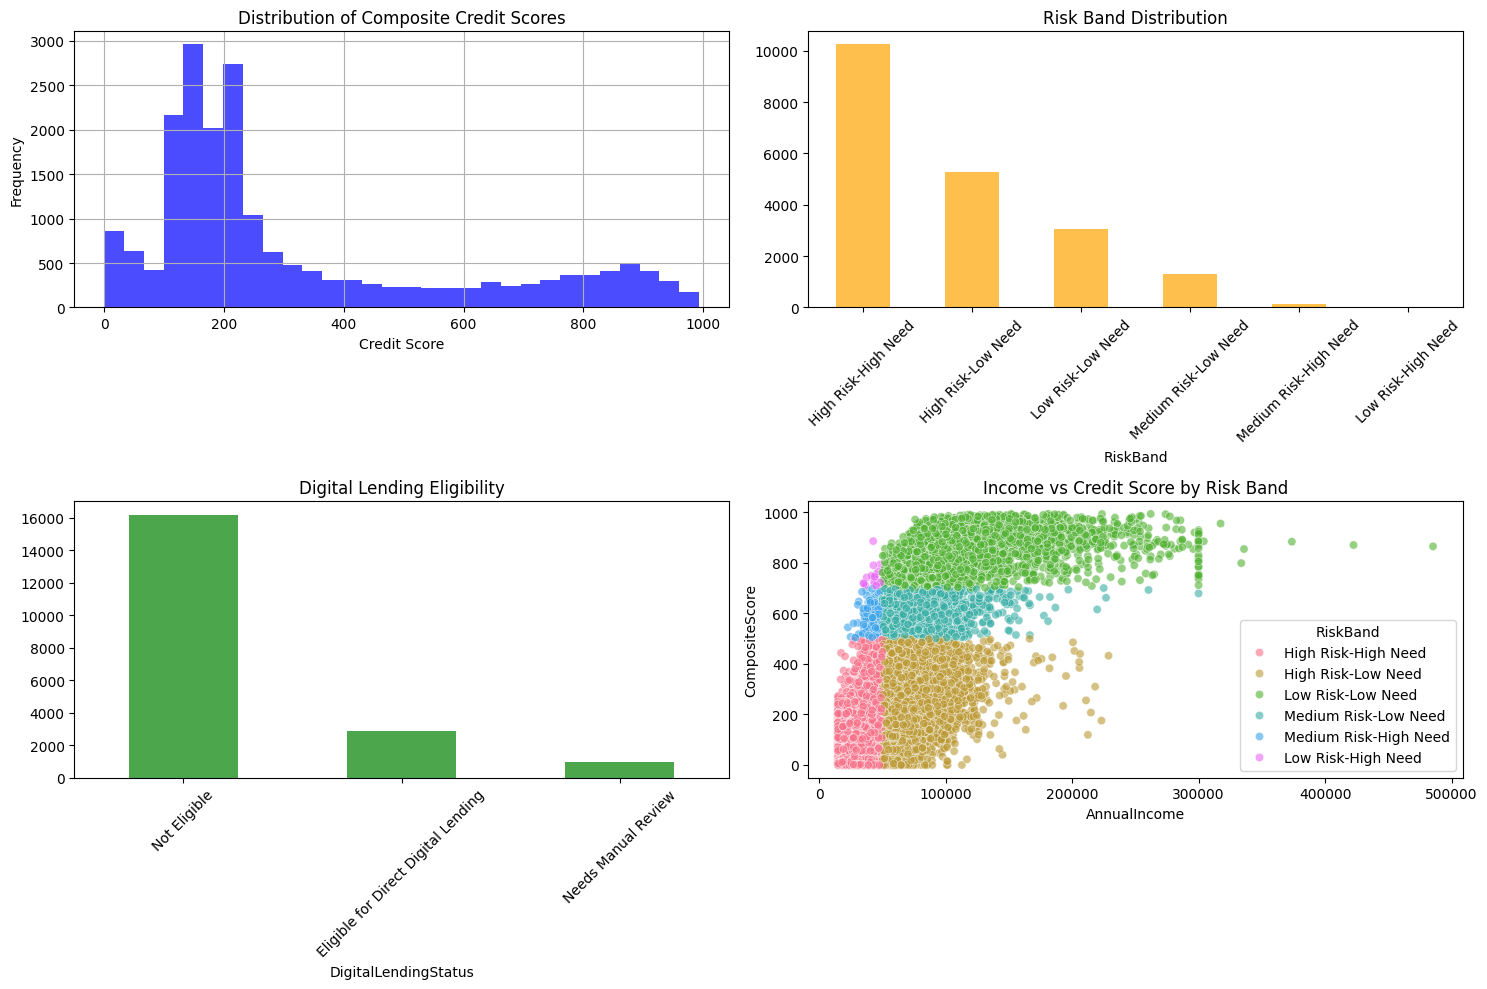

In [149]:
# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['CompositeScore'].hist(bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Composite Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
df['RiskBand'].value_counts().plot(kind='bar', color='orange', alpha=0.7)
plt.title('Risk Band Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
df['DigitalLendingStatus'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Digital Lending Eligibility')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='AnnualIncome', y='CompositeScore', hue='RiskBand', alpha=0.6)
plt.title('Income vs Credit Score by Risk Band')

plt.tight_layout()
plt.show()